In [1]:
require(ISLR2)
require(tree)
attach(Carseats)


Loading required package: ISLR2

Loading required package: tree

Warning message:
"package 'tree' was built under R version 4.4.1"


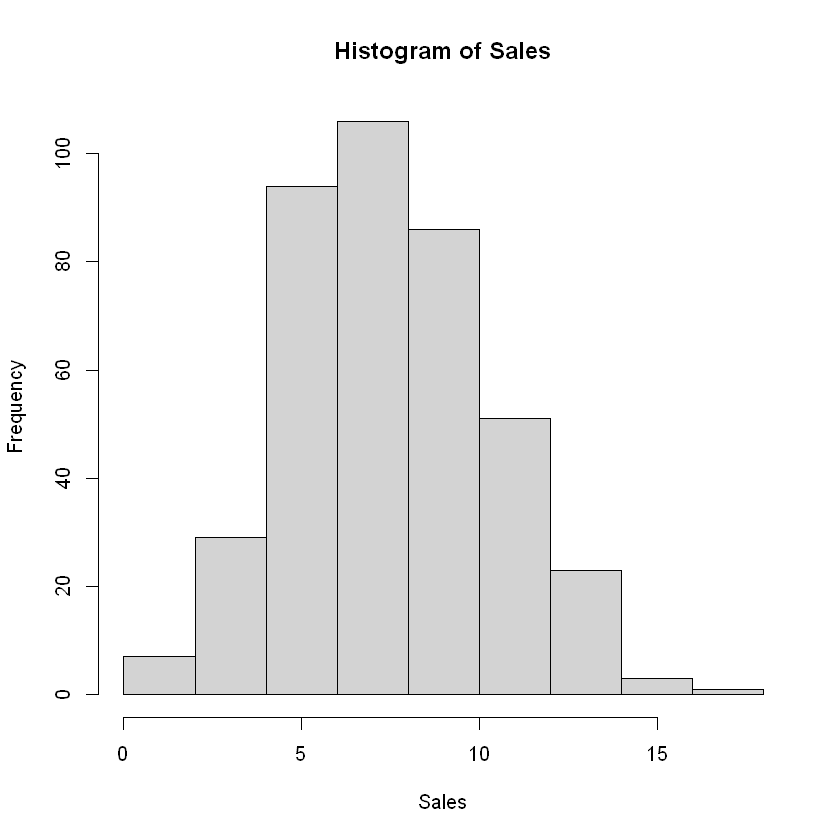

In [2]:
hist(Sales)


In [3]:
High <- ifelse(Sales <= 8, "No", "Yes")


In [4]:
Carseats <- data.frame(Carseats, High = as.factor(High))


In [5]:
tree_carseats <- tree(High ~ . - Sales, data = Carseats)


In [6]:
summary(tree_carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

In [7]:
require(repr)

# Set the plot size (in inches)
options(repr.plot.width = 20, repr.plot.height = 12)

Loading required package: repr



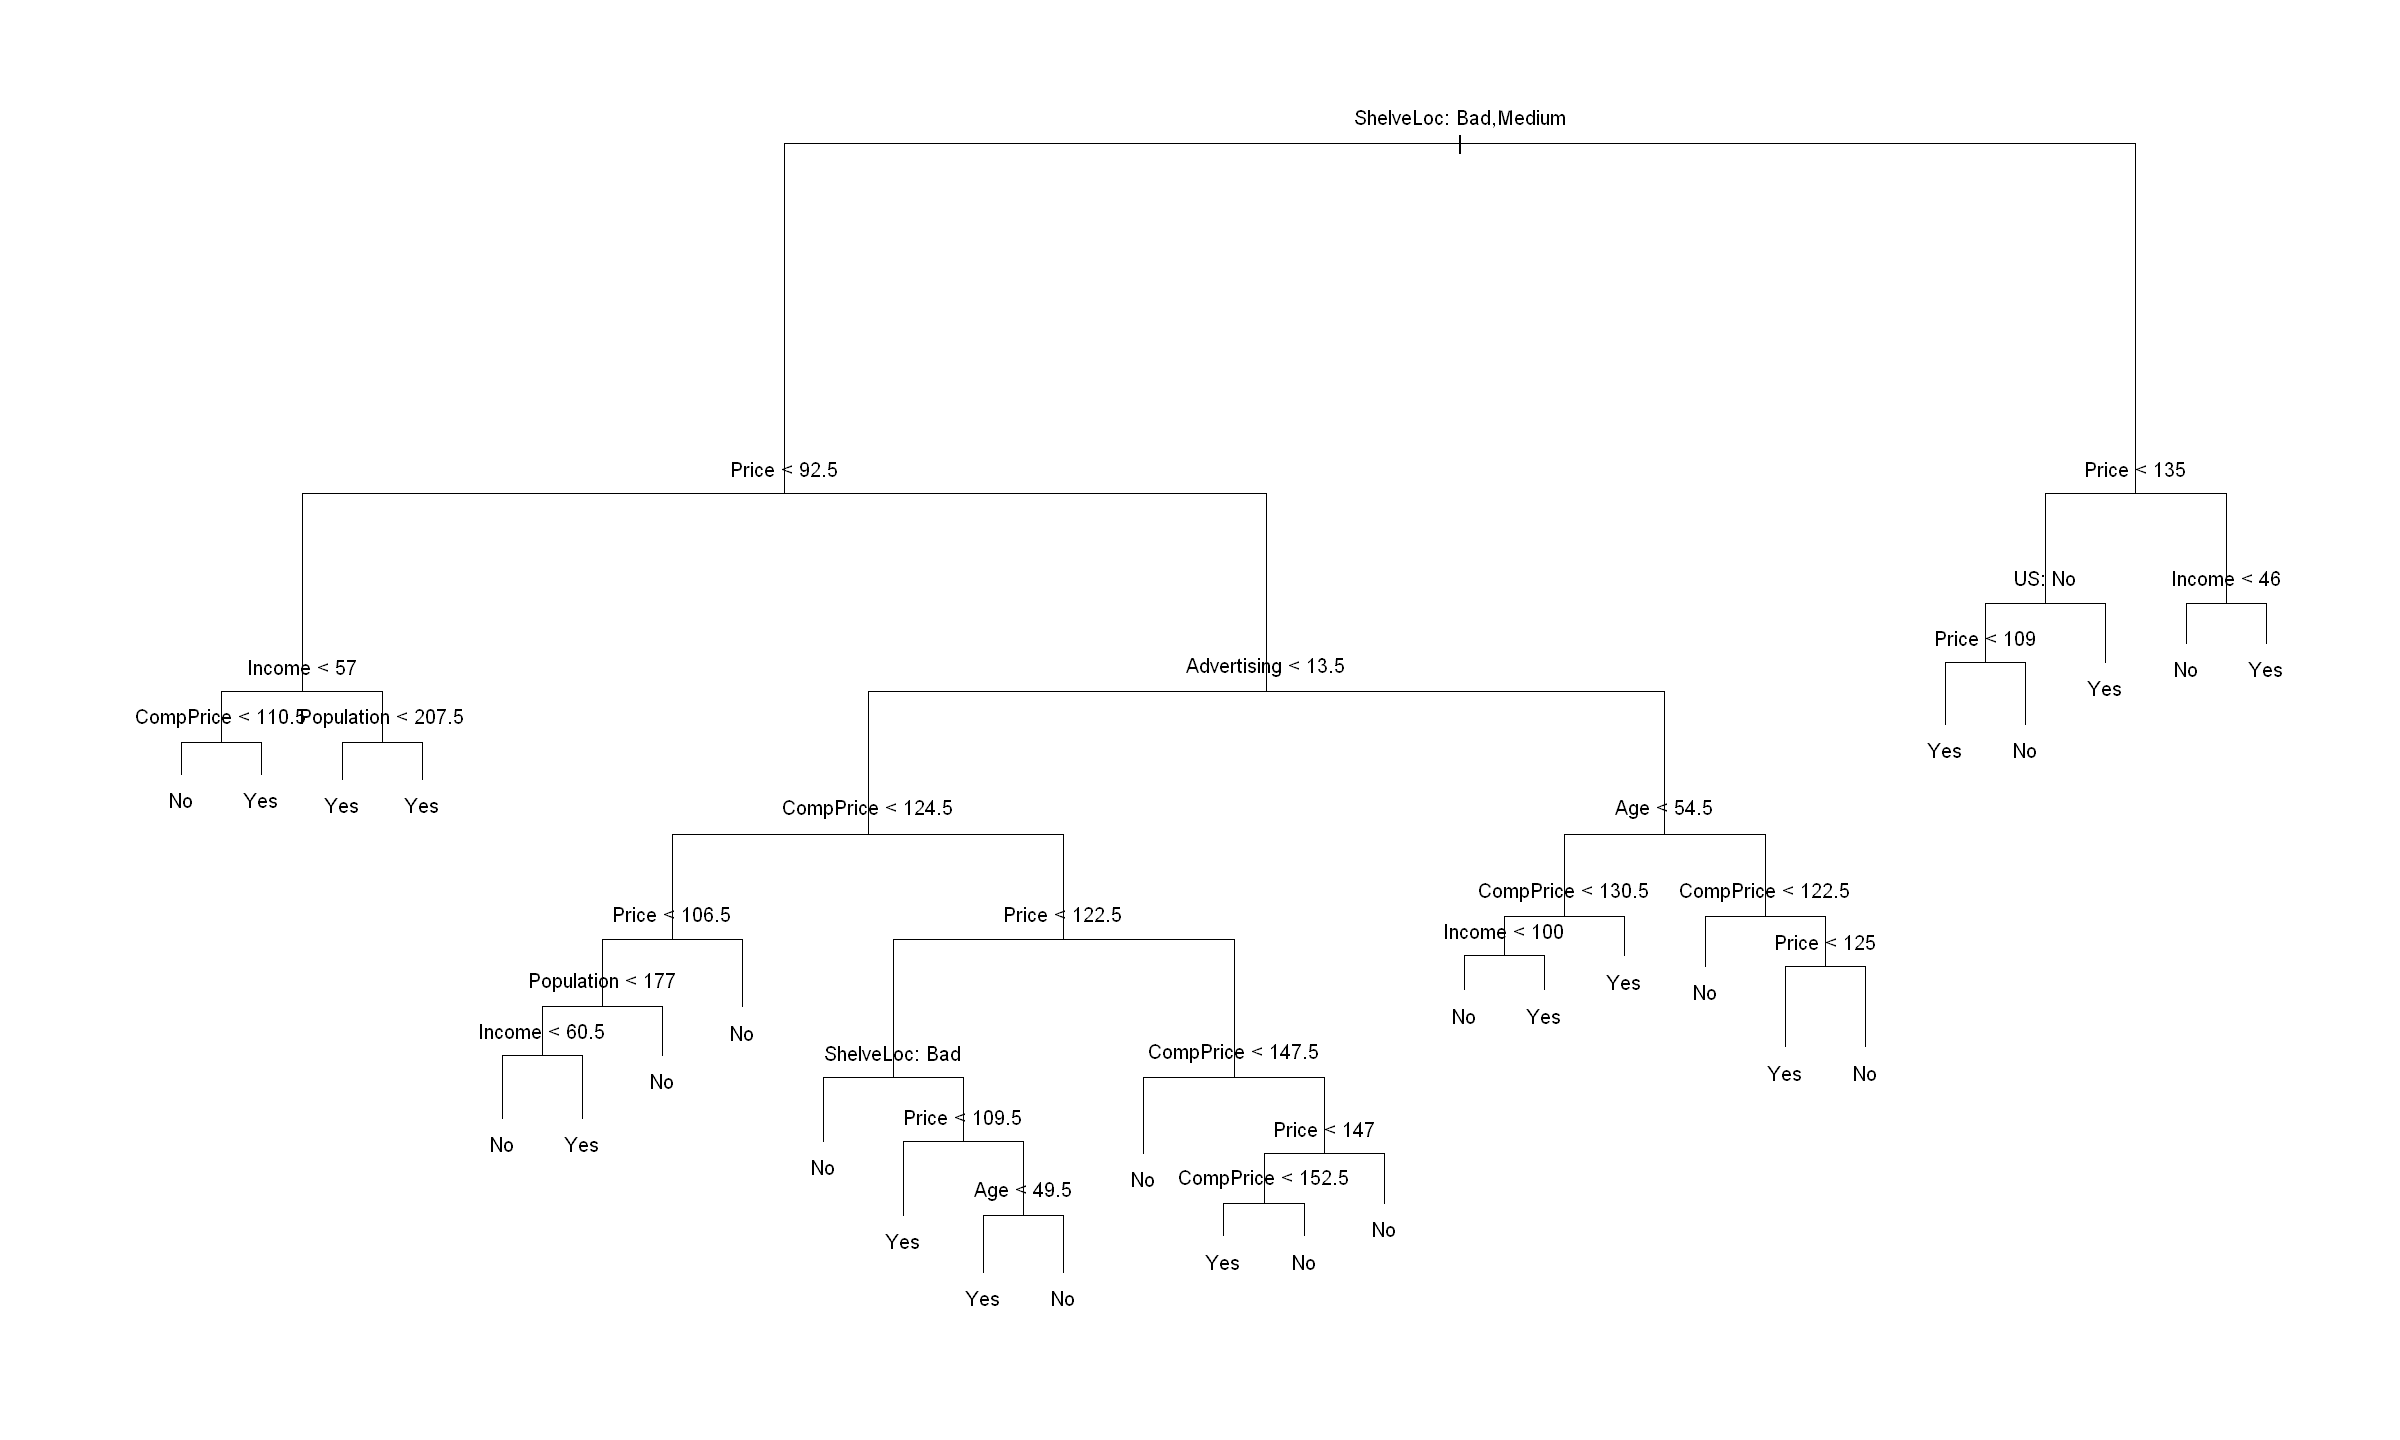

In [8]:
plot(tree_carseats)
text(tree_carseats, pretty = 0)

In [9]:
tree_carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

In [10]:
set.seed(1011)

In [11]:
train <- sample( 1 : nrow(Carseats), 250) # nolint

In [12]:
train

[1] 127   8  45  62 153 335  16 229 122 287 197  12 381 109 176  21 177 191
 [19]  31 133 120 341 270  53 319  59 307 398 326 146 126  78 195  17 201 121
 [37] 327 313  14 357  71 129 244 309  56 151 105 386 124  46  77 377 227  51
 [55] 219 137   7 131 182 178 217 142 340 336   2  54 117 107 196 306 360  67
 [73] 159 209 284 256 373 351  22 183  63 211 247 123 388  89 213 200 323 100
 [91] 139  91 199 286 363 290 347 263 161 324  47 215 352 291 321 334 186 144
[109]  13  75 346 143 118  69 147 302 281 259 337 279  24 261 250 172 234 160
[127] 292 221  48 225  99  43 345 379 243  25 325 395 303 168 141 101 165 130
[145]  33 249 375 274 396 152  32 174 314 108 262 188  40 301 111 355 283 295
[163] 245 372 255 266 136  73 185 239 384 189 356 103  61  39 157  80 297  72
[181]  90 298 228 359 180   6 349 112  74  37 171 238 198  44 311 158 278 114
[199] 110 207  65 369 155  10  81 273  79 128  83 119  58 272  19 296  11 271
[217] 236 317 361 342 224 394 204 268  85 149 257 235  87 344 167  28 237 164
[235] 385 320 231 322 232 170 154 106 304  52 305  70 187 392 288 366

In [13]:
tree_carseats_subset <- tree(High ~ . - Sales, data = Carseats, subset = train)

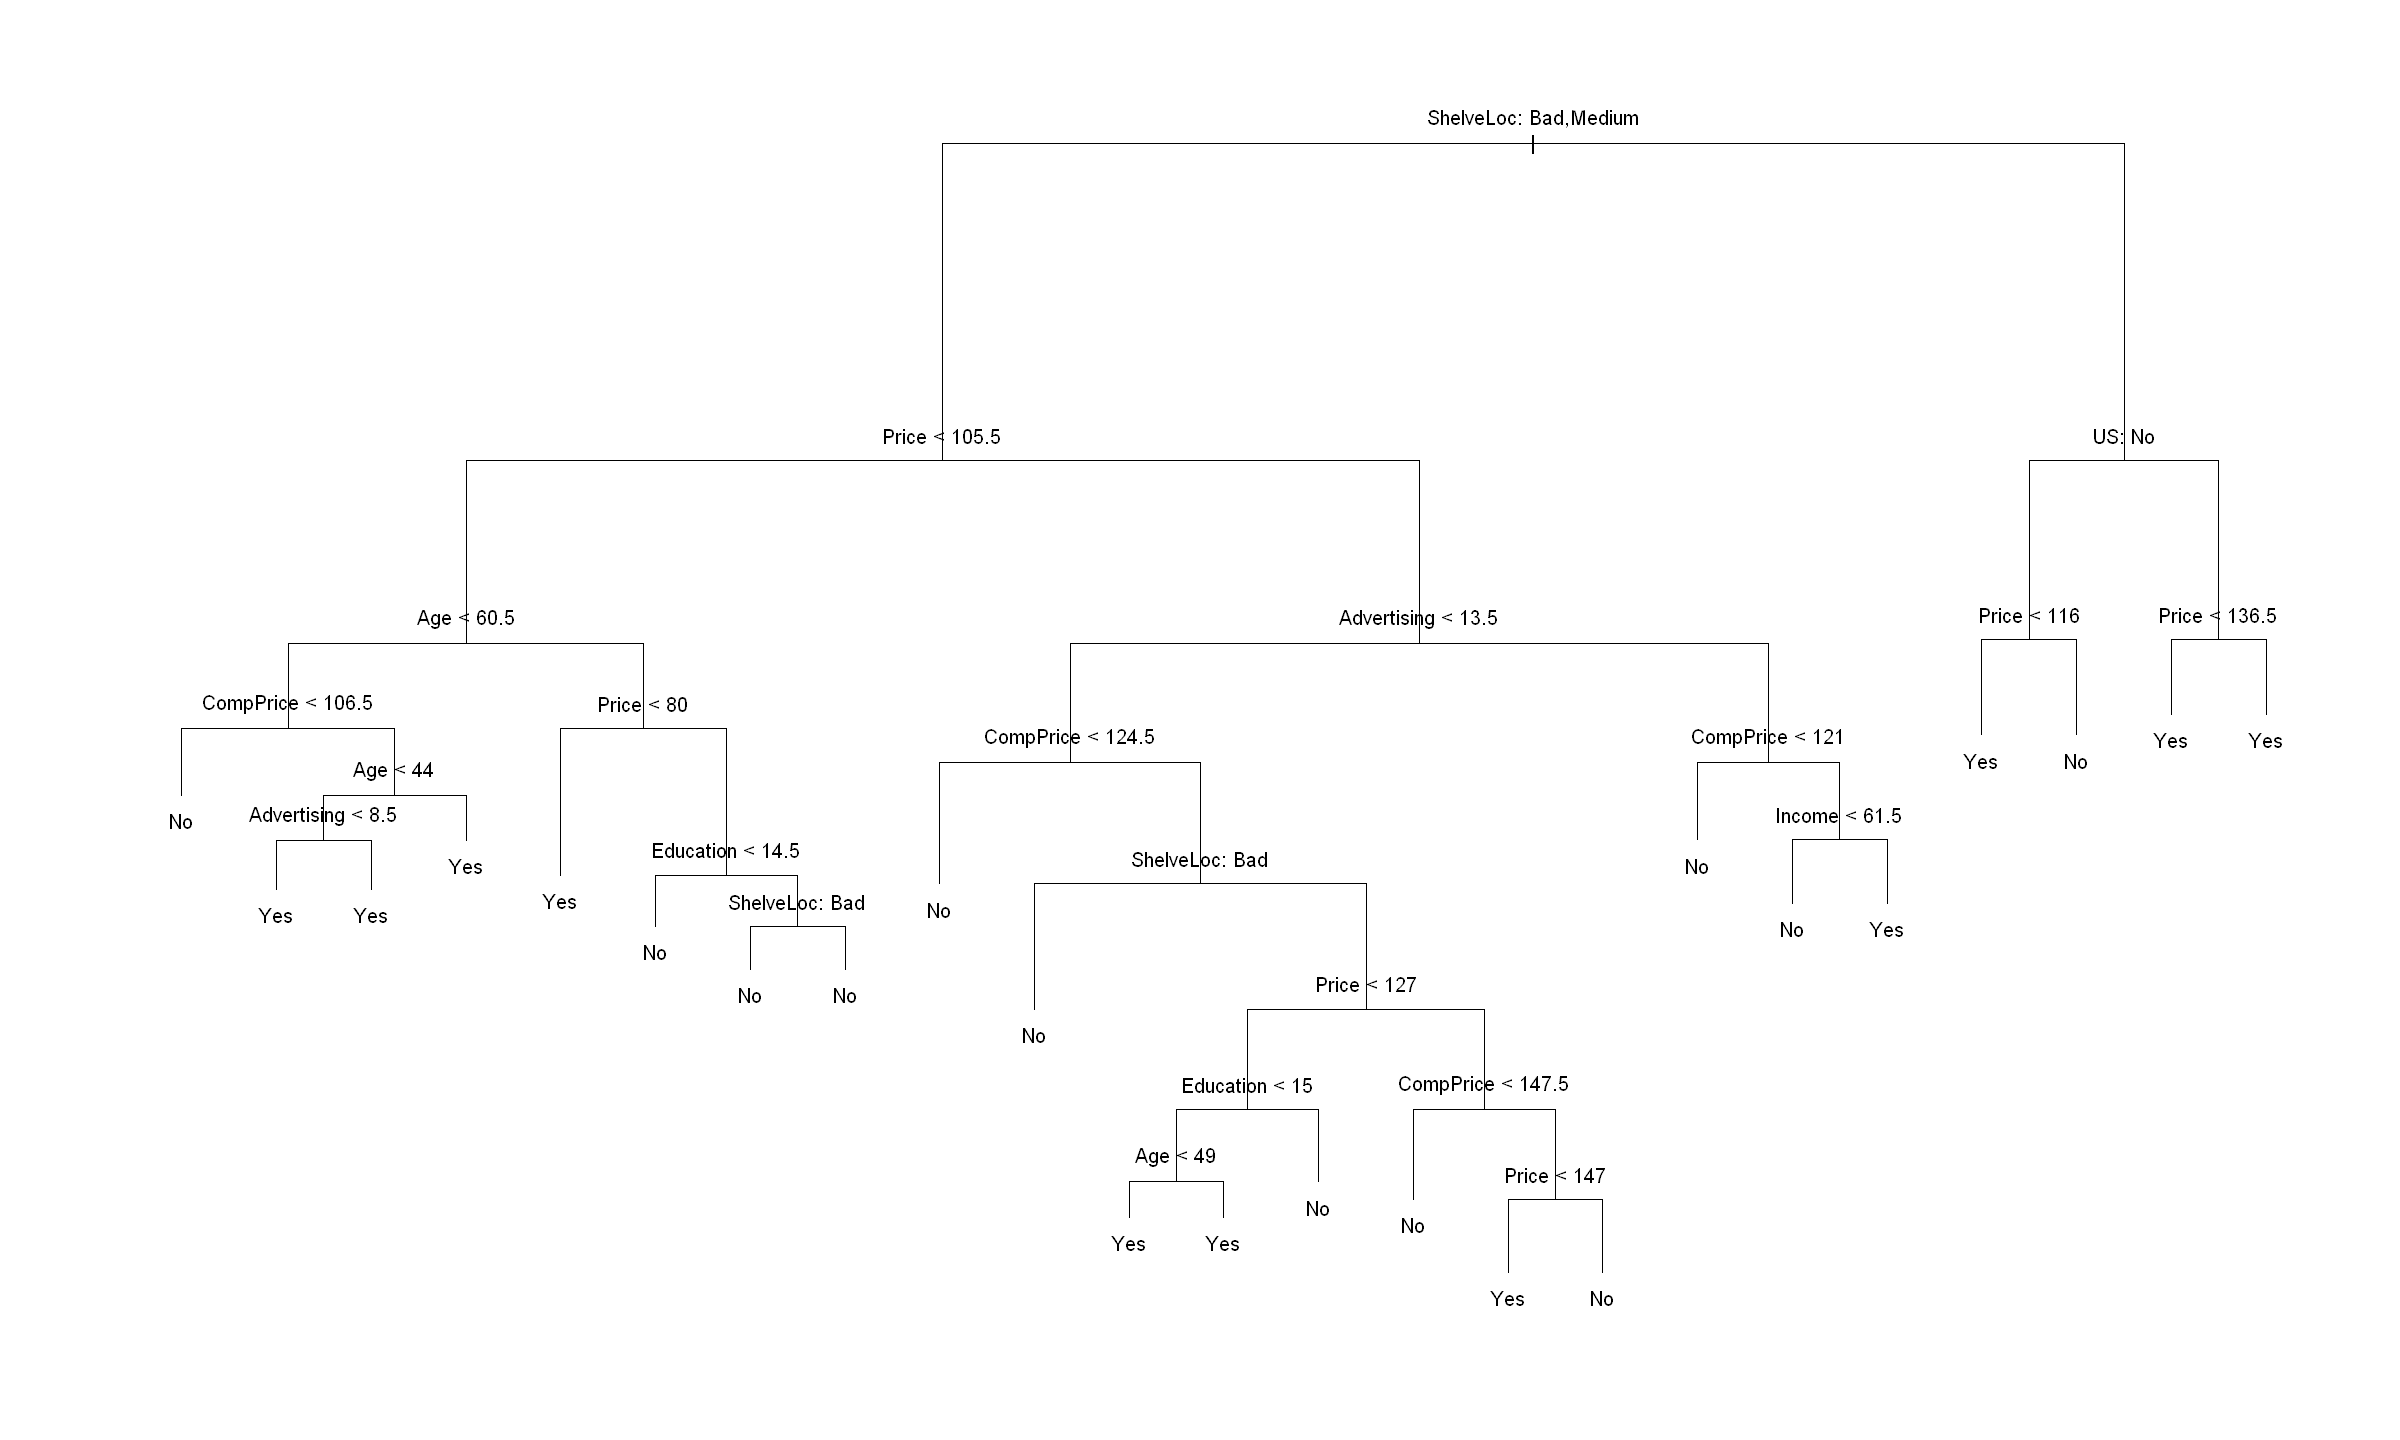

In [14]:
plot(tree_carseats_subset)
text(tree_carseats_subset, pretty = 0)

In [15]:
tree_pred_subset <- predict(tree_carseats_subset, Carseats[-train,], type = "class")


In [19]:
typeof(tree_pred_subset)

[1] "integer"

In [16]:
with(Carseats[-train, ], table(tree_pred_subset, High))

                High
tree_pred_subset No Yes
             No  58  20
             Yes 27  45

In [20]:
cv_carseats = cv.tree(  tree_carseats_subset, FUN = prune.misclass)

In [21]:
cv_carseats

$size
 [1] 23 17 16 14 10  8  6  5  4  2  1

$dev
 [1]  62  62  60  61  69  81  79  81  81  81 100

$k
 [1] -Inf  0.0  1.0  1.5  2.0  3.0  3.5  5.0  6.0  7.0 27.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

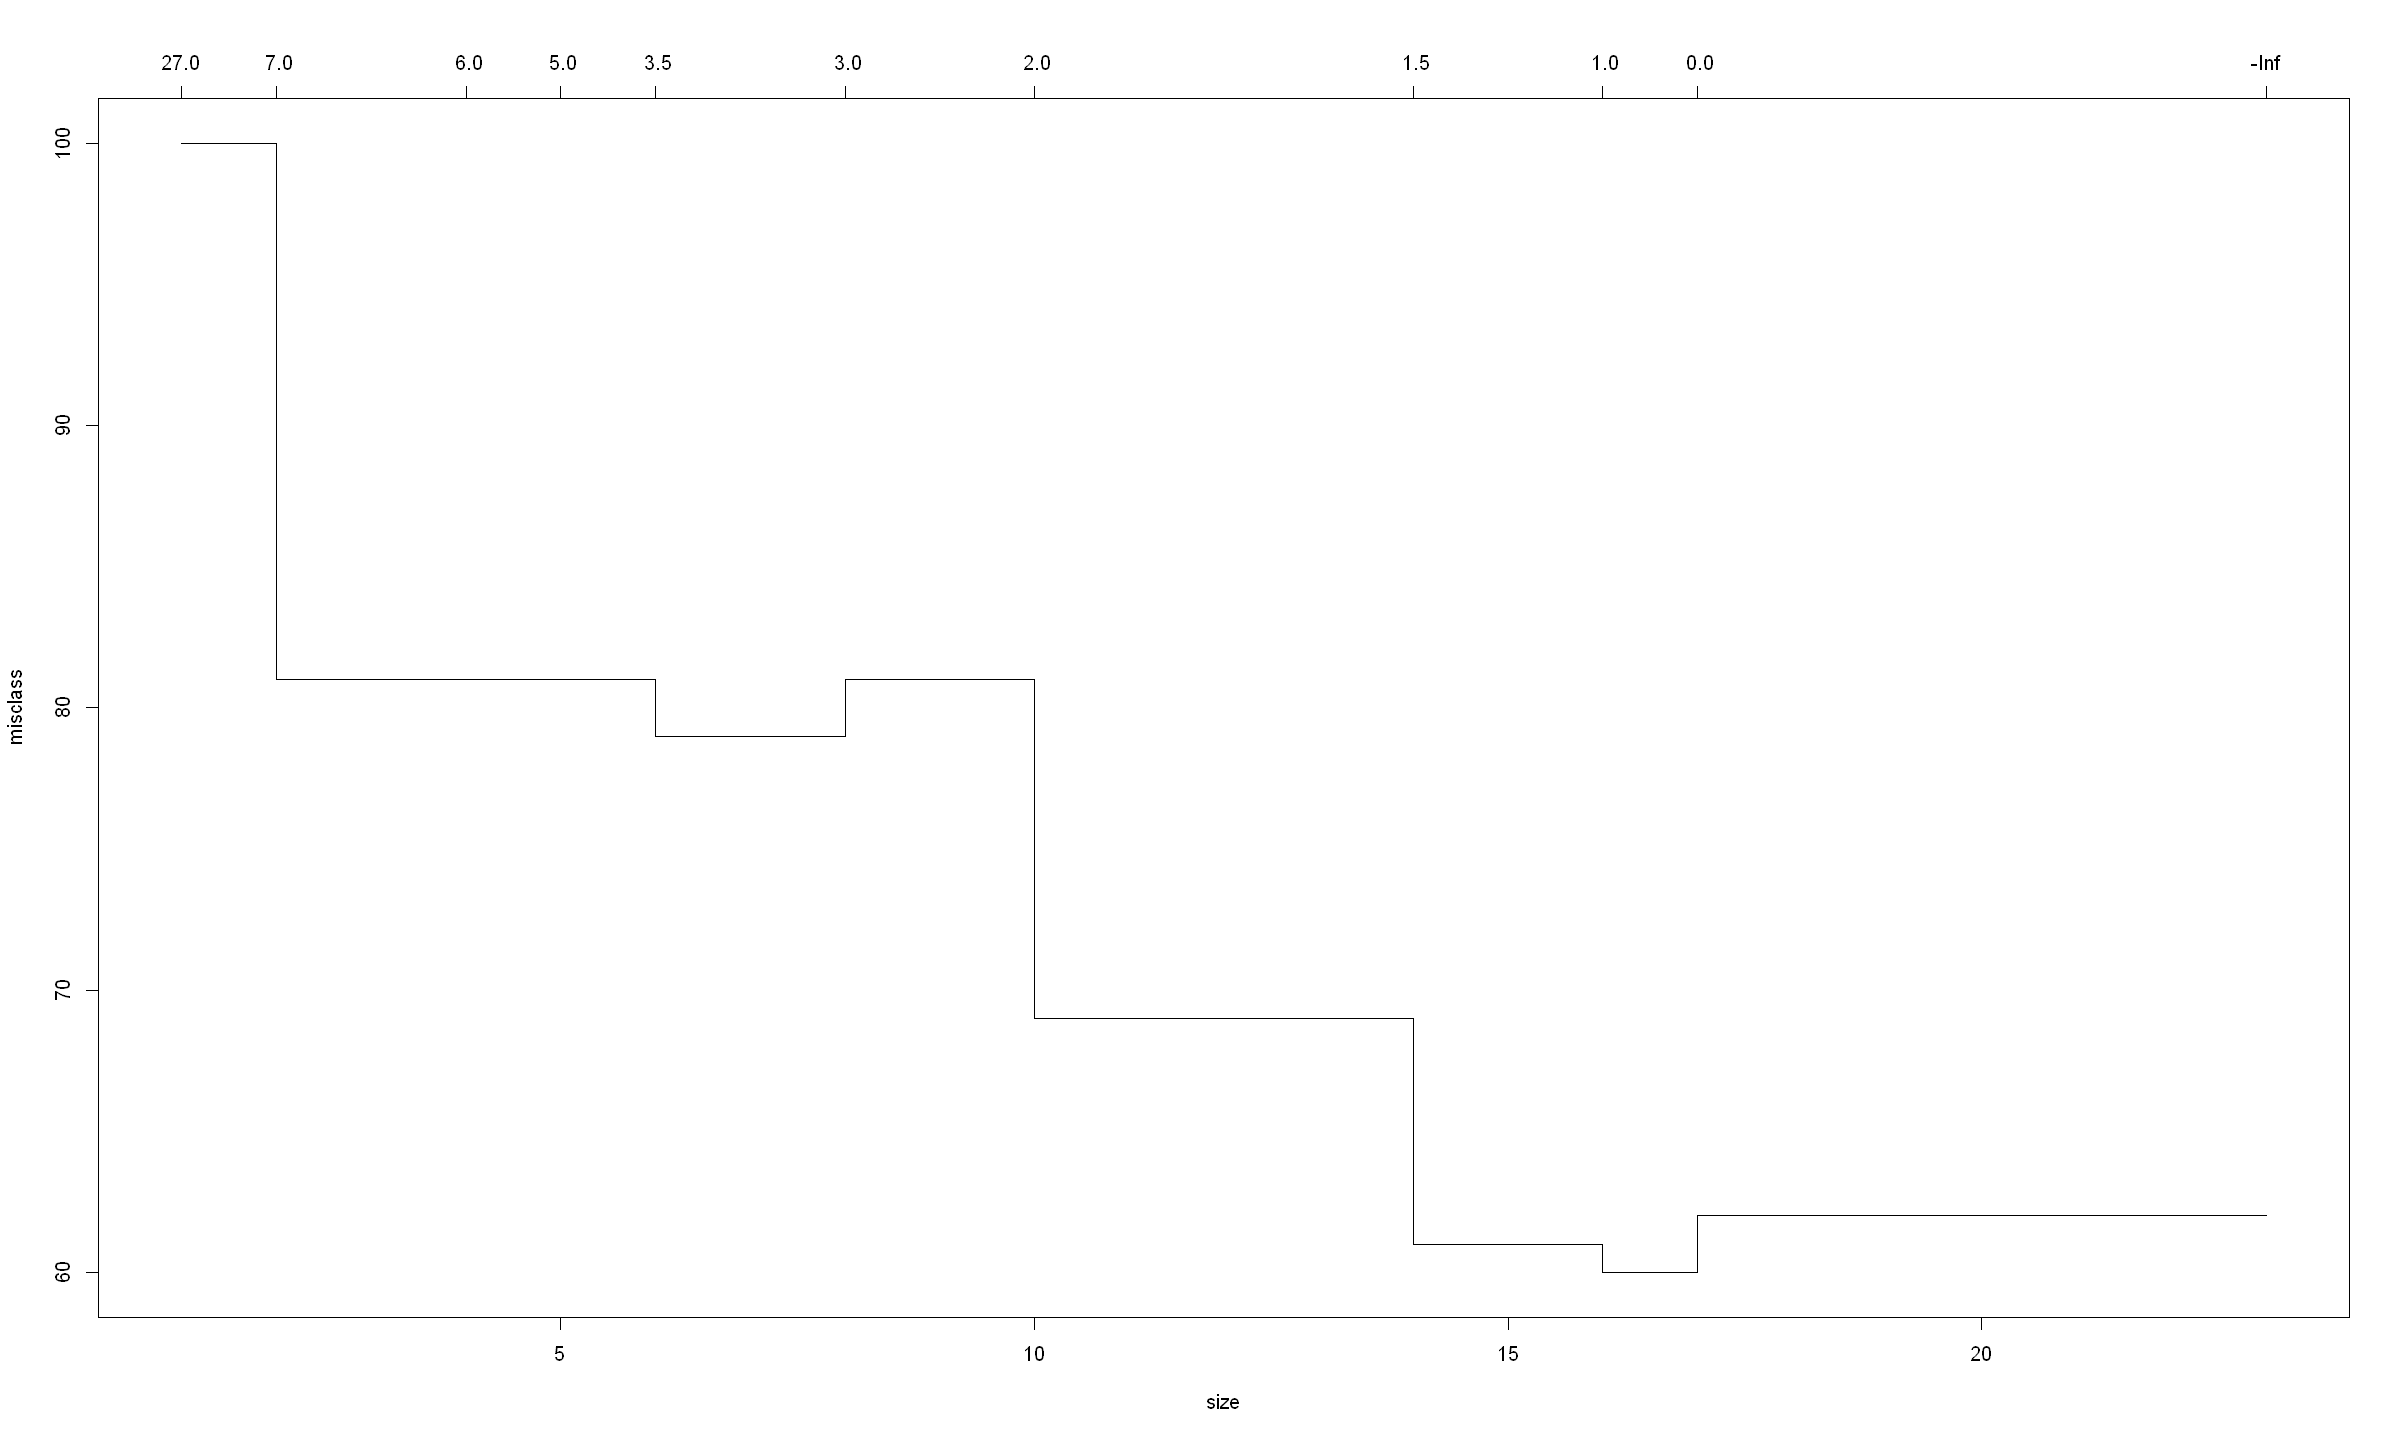

In [22]:
plot(cv_carseats)

In [23]:
prune_carseats = prune.misclass(tree_carseats_subset, best = 13)

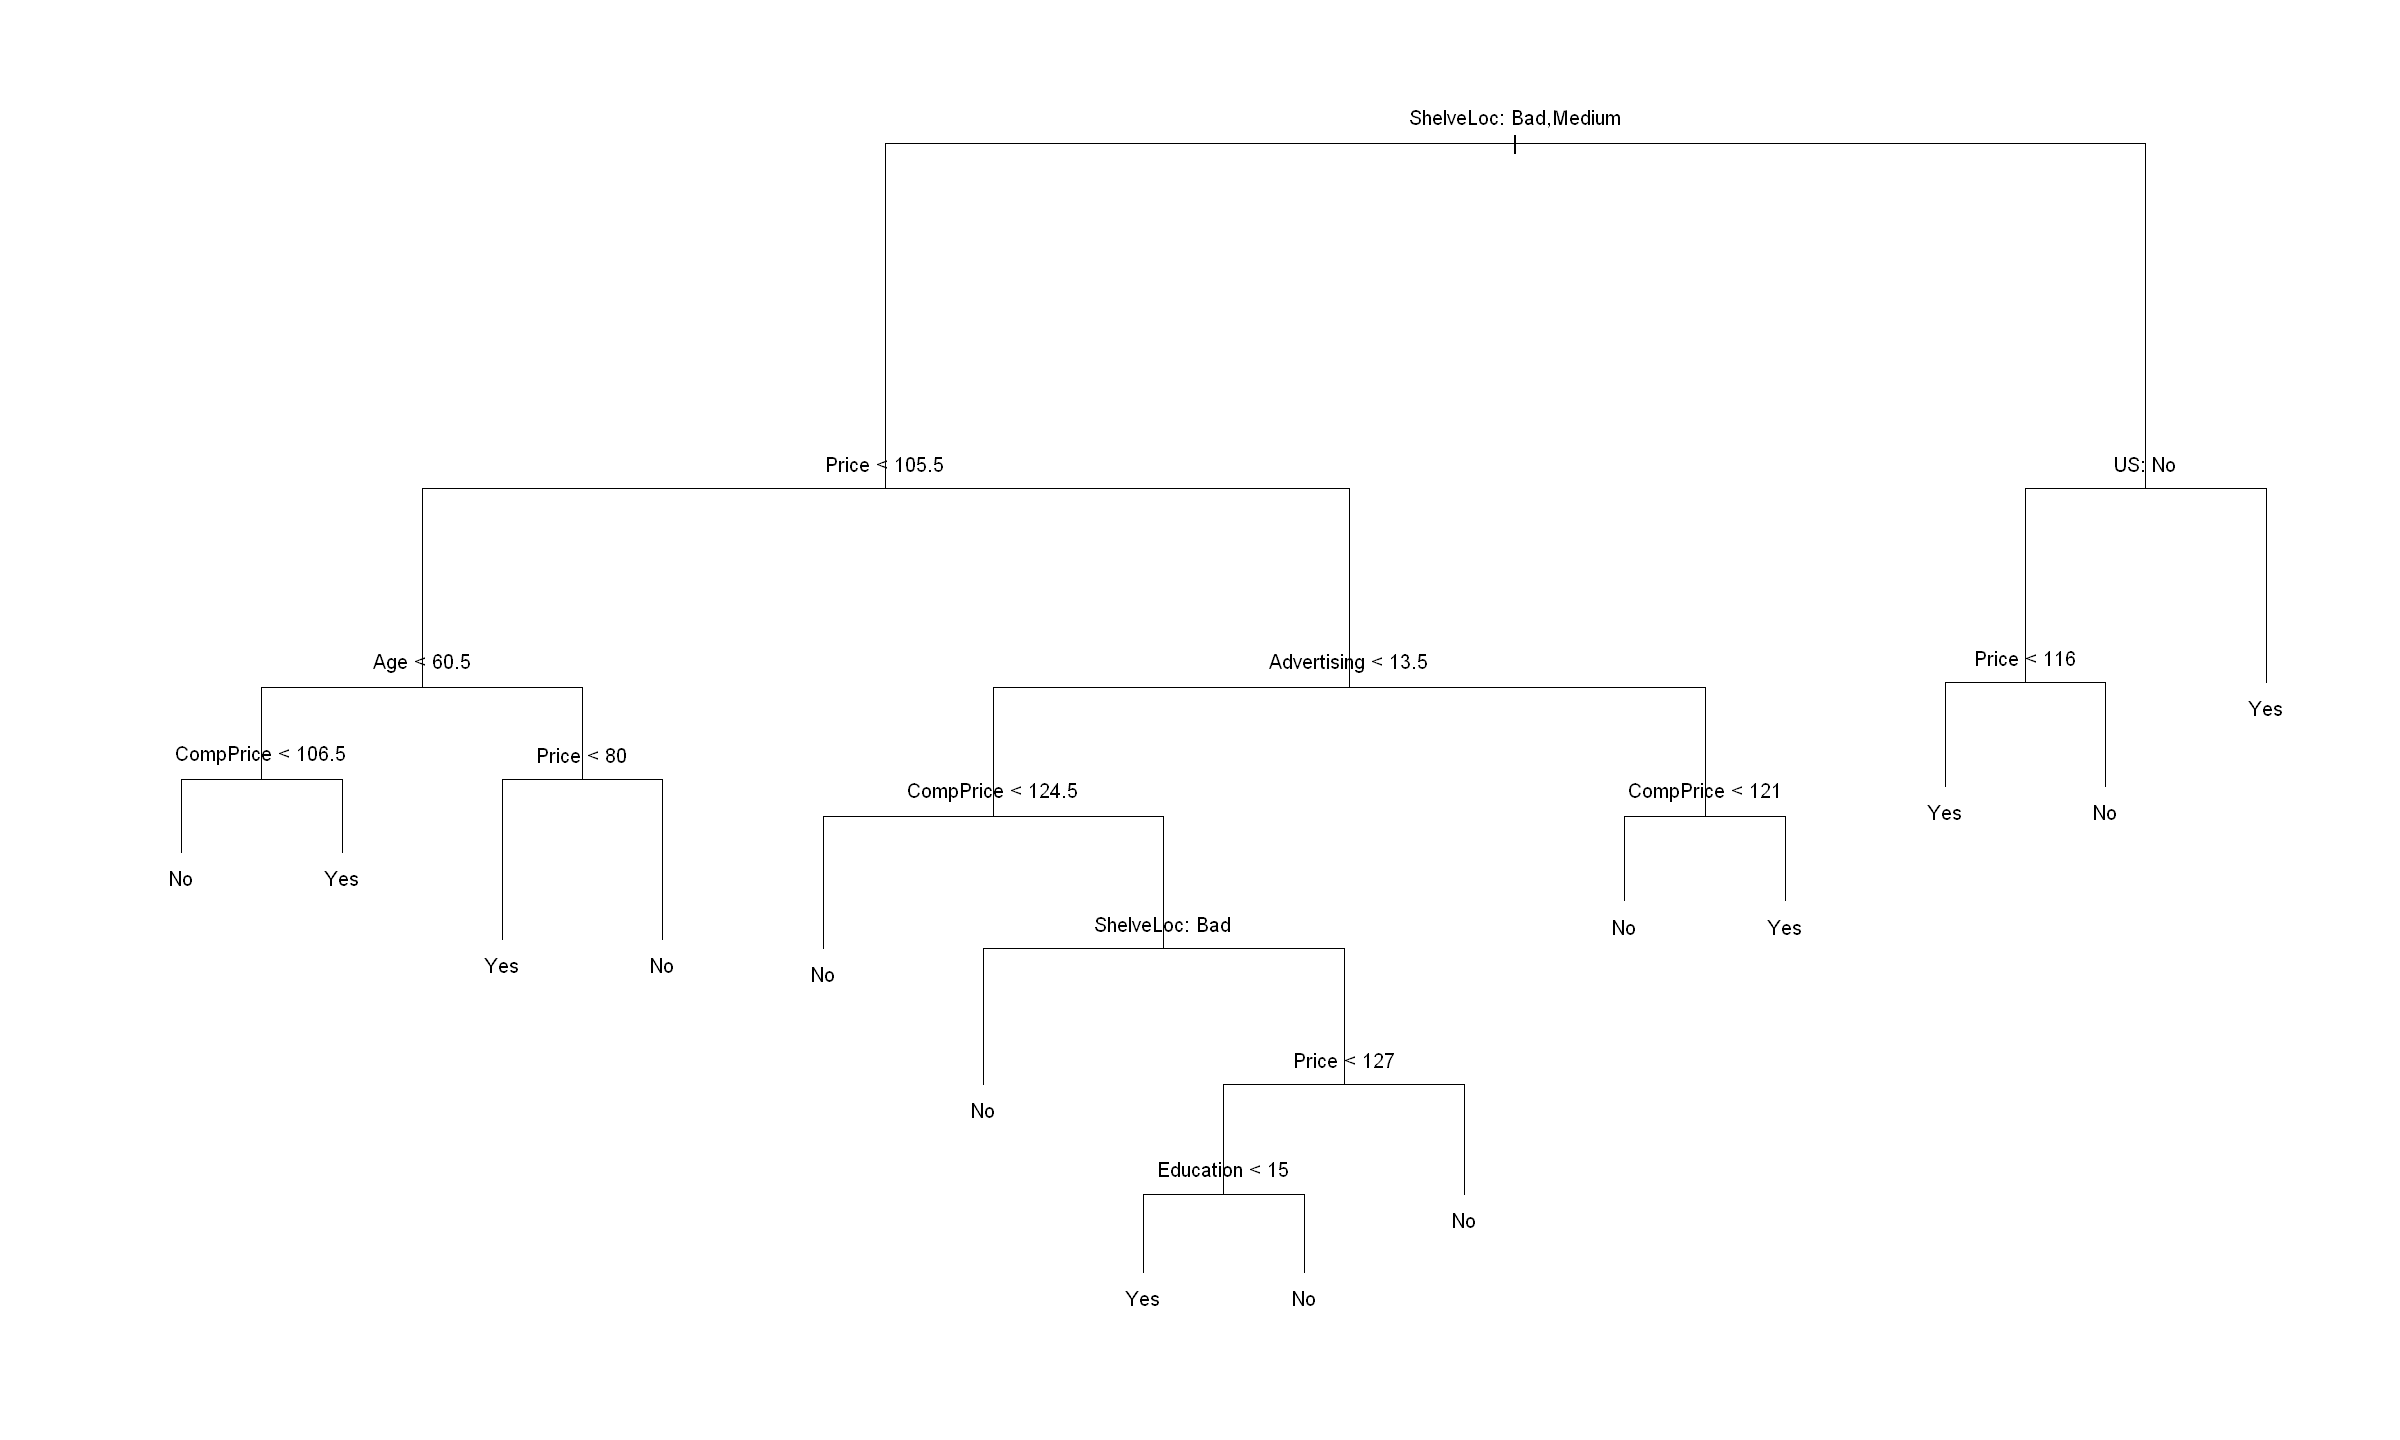

In [26]:
plot(prune_carseats)
text(prune_carseats, pretty = 0)

In [27]:
prune_carseats_pred = predict(prune_carseats, Carseats[-train,], type = 'class')

In [28]:
with(Carseats[-train,], table(prune_carseats_pred,High))

                   High
prune_carseats_pred No Yes
                No  59  19
                Yes 26  46

In [32]:
require(randomForest)
require(MASS)

Loading required package: MASS




Attaching package: 'MASS'


The following object is masked from 'package:ISLR2':

    Boston




In [33]:
set.seed(101)

In [34]:
dim(Boston)

[1] 506  14

In [36]:
train = sample(1:nrow(Boston),300)

In [37]:
?Boston

Boston                  package:ISLR2                  R Documentation

_B_o_s_t_o_n _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     A data set containing housing values in 506 suburbs of Boston.

_U_s_a_g_e:

     Boston
     
_F_o_r_m_a_t:

     A data frame with 506 rows and 13 variables.

     'crim' per capita crime rate by town.

     'zn' proportion of residential land zoned for lots over 25,000
          sq.ft.

     'indus' proportion of non-retail business acres per town.

     'chas' Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

     'nox' nitrogen oxides concentration (parts per 10 million).

     'rm' average number of rooms per dwelling.

     'age' proportion of owner-occupied units built prior to 1940.

     'dis' weighted mean of distances to five Boston employment
          centres.

     'rad' index of accessibility to radial highways.

     'tax' full-value property-tax rate per $10,000.

     'ptratio' pup

In [38]:
rf_boston = randomForest(medv ~ ., data =Boston, subset = train)

In [39]:
rf_boston


Call:
 randomForest(formula = medv ~ ., data = Boston, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.68651
                    % Var explained: 83.45

In [42]:
oob_err = double(13)
test_err = double(13)

In [44]:
for (mtry in 1:13) {
    fit <- randomForest(medv ~ ., data = Boston, subset = train, mtry = mtry, ntree = 400)
    oob_err[mtry] <- fit$mse[400]
    pred <- predict(fit, Boston[-train, ])
    test_err[mtry] <- with(Boston[-train, ], mean((medv - pred)^2))
    cat(mtry, " ")
}


1  2  3  4  5  6  7  8  9  10  11  12  13  

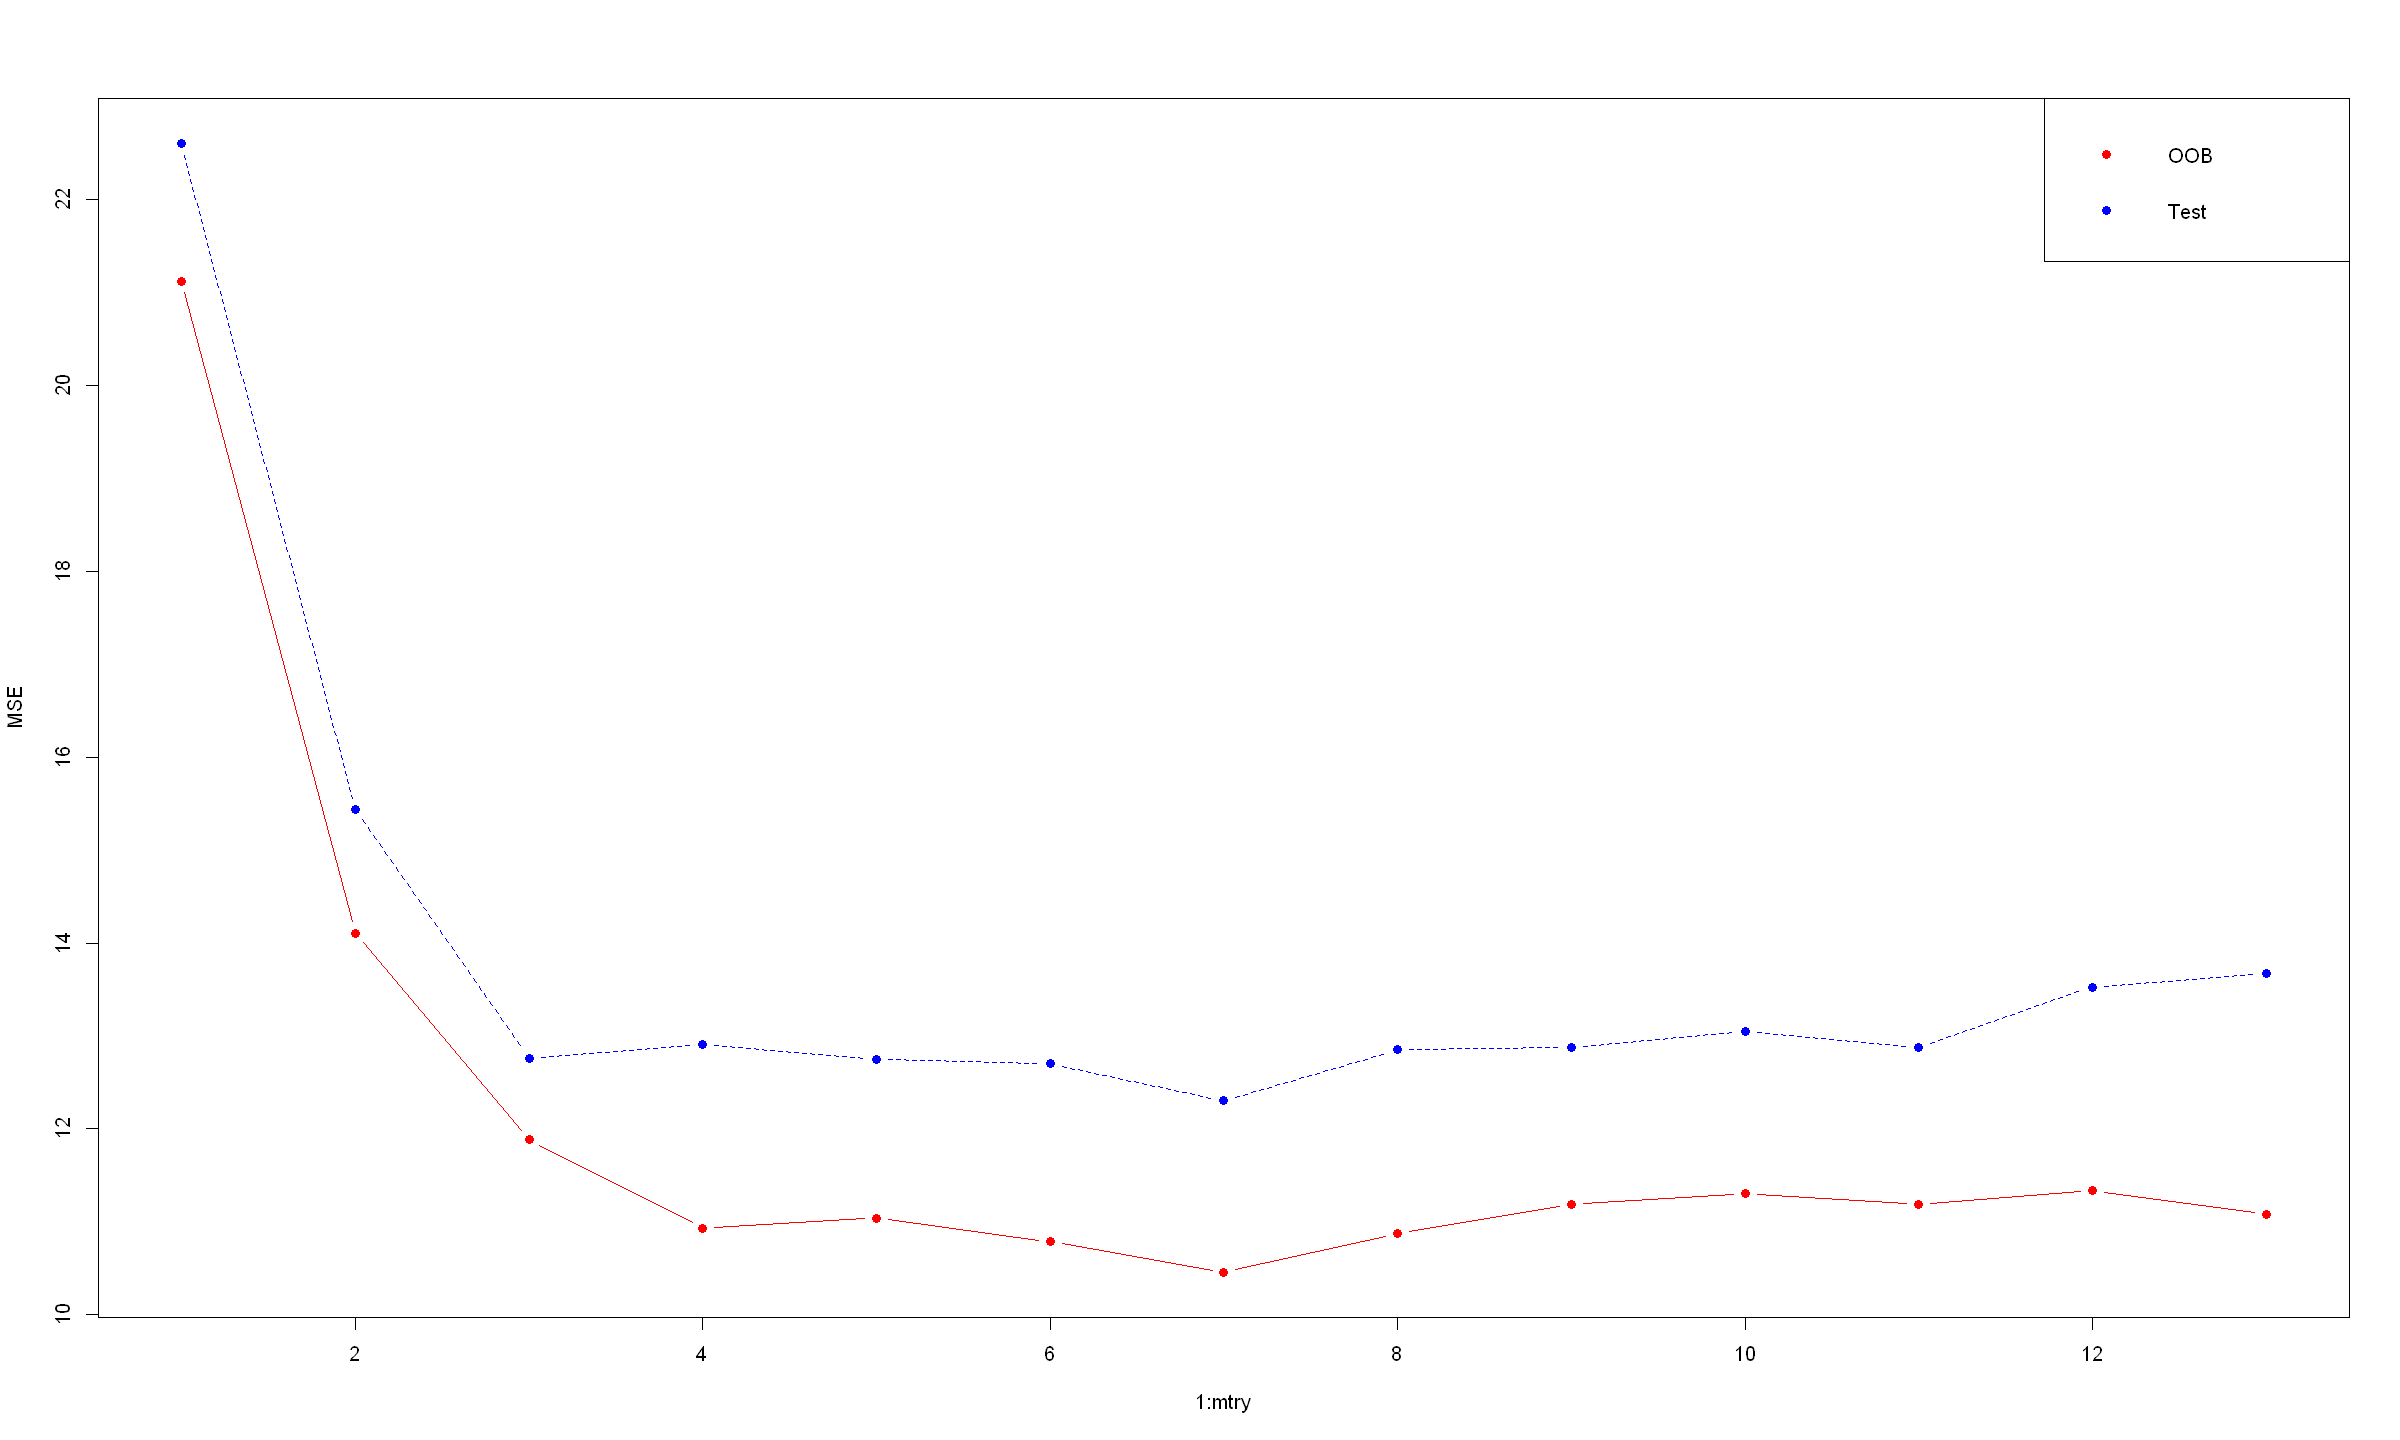

In [47]:
matplot(1:mtry, cbind(test_err, oob_err), pch = 19, col = c(
  "red",
  "blue"
), type = "b", ylab = "MSE")
legend("topright", legend = c("OOB", "Test"), pch = 19, col = c("red", "blue"))


In [51]:
require(gbm)

In [52]:
boost_boston = gbm(medv ~ ., data = Boston[train,],
distribution = 'gaussian',
n.trees = 10000,
shrinkage = 0.01,
interaction.depth = 4)

,var,rel.inf
,<chr>,<dbl>
lstat,lstat,36.75502584
rm,rm,27.80265212
dis,dis,9.61544645
crim,crim,5.95765325
age,age,5.26969367
nox,nox,4.25729023
black,black,3.23095586
ptratio,ptratio,2.34798816
tax,tax,2.16381646


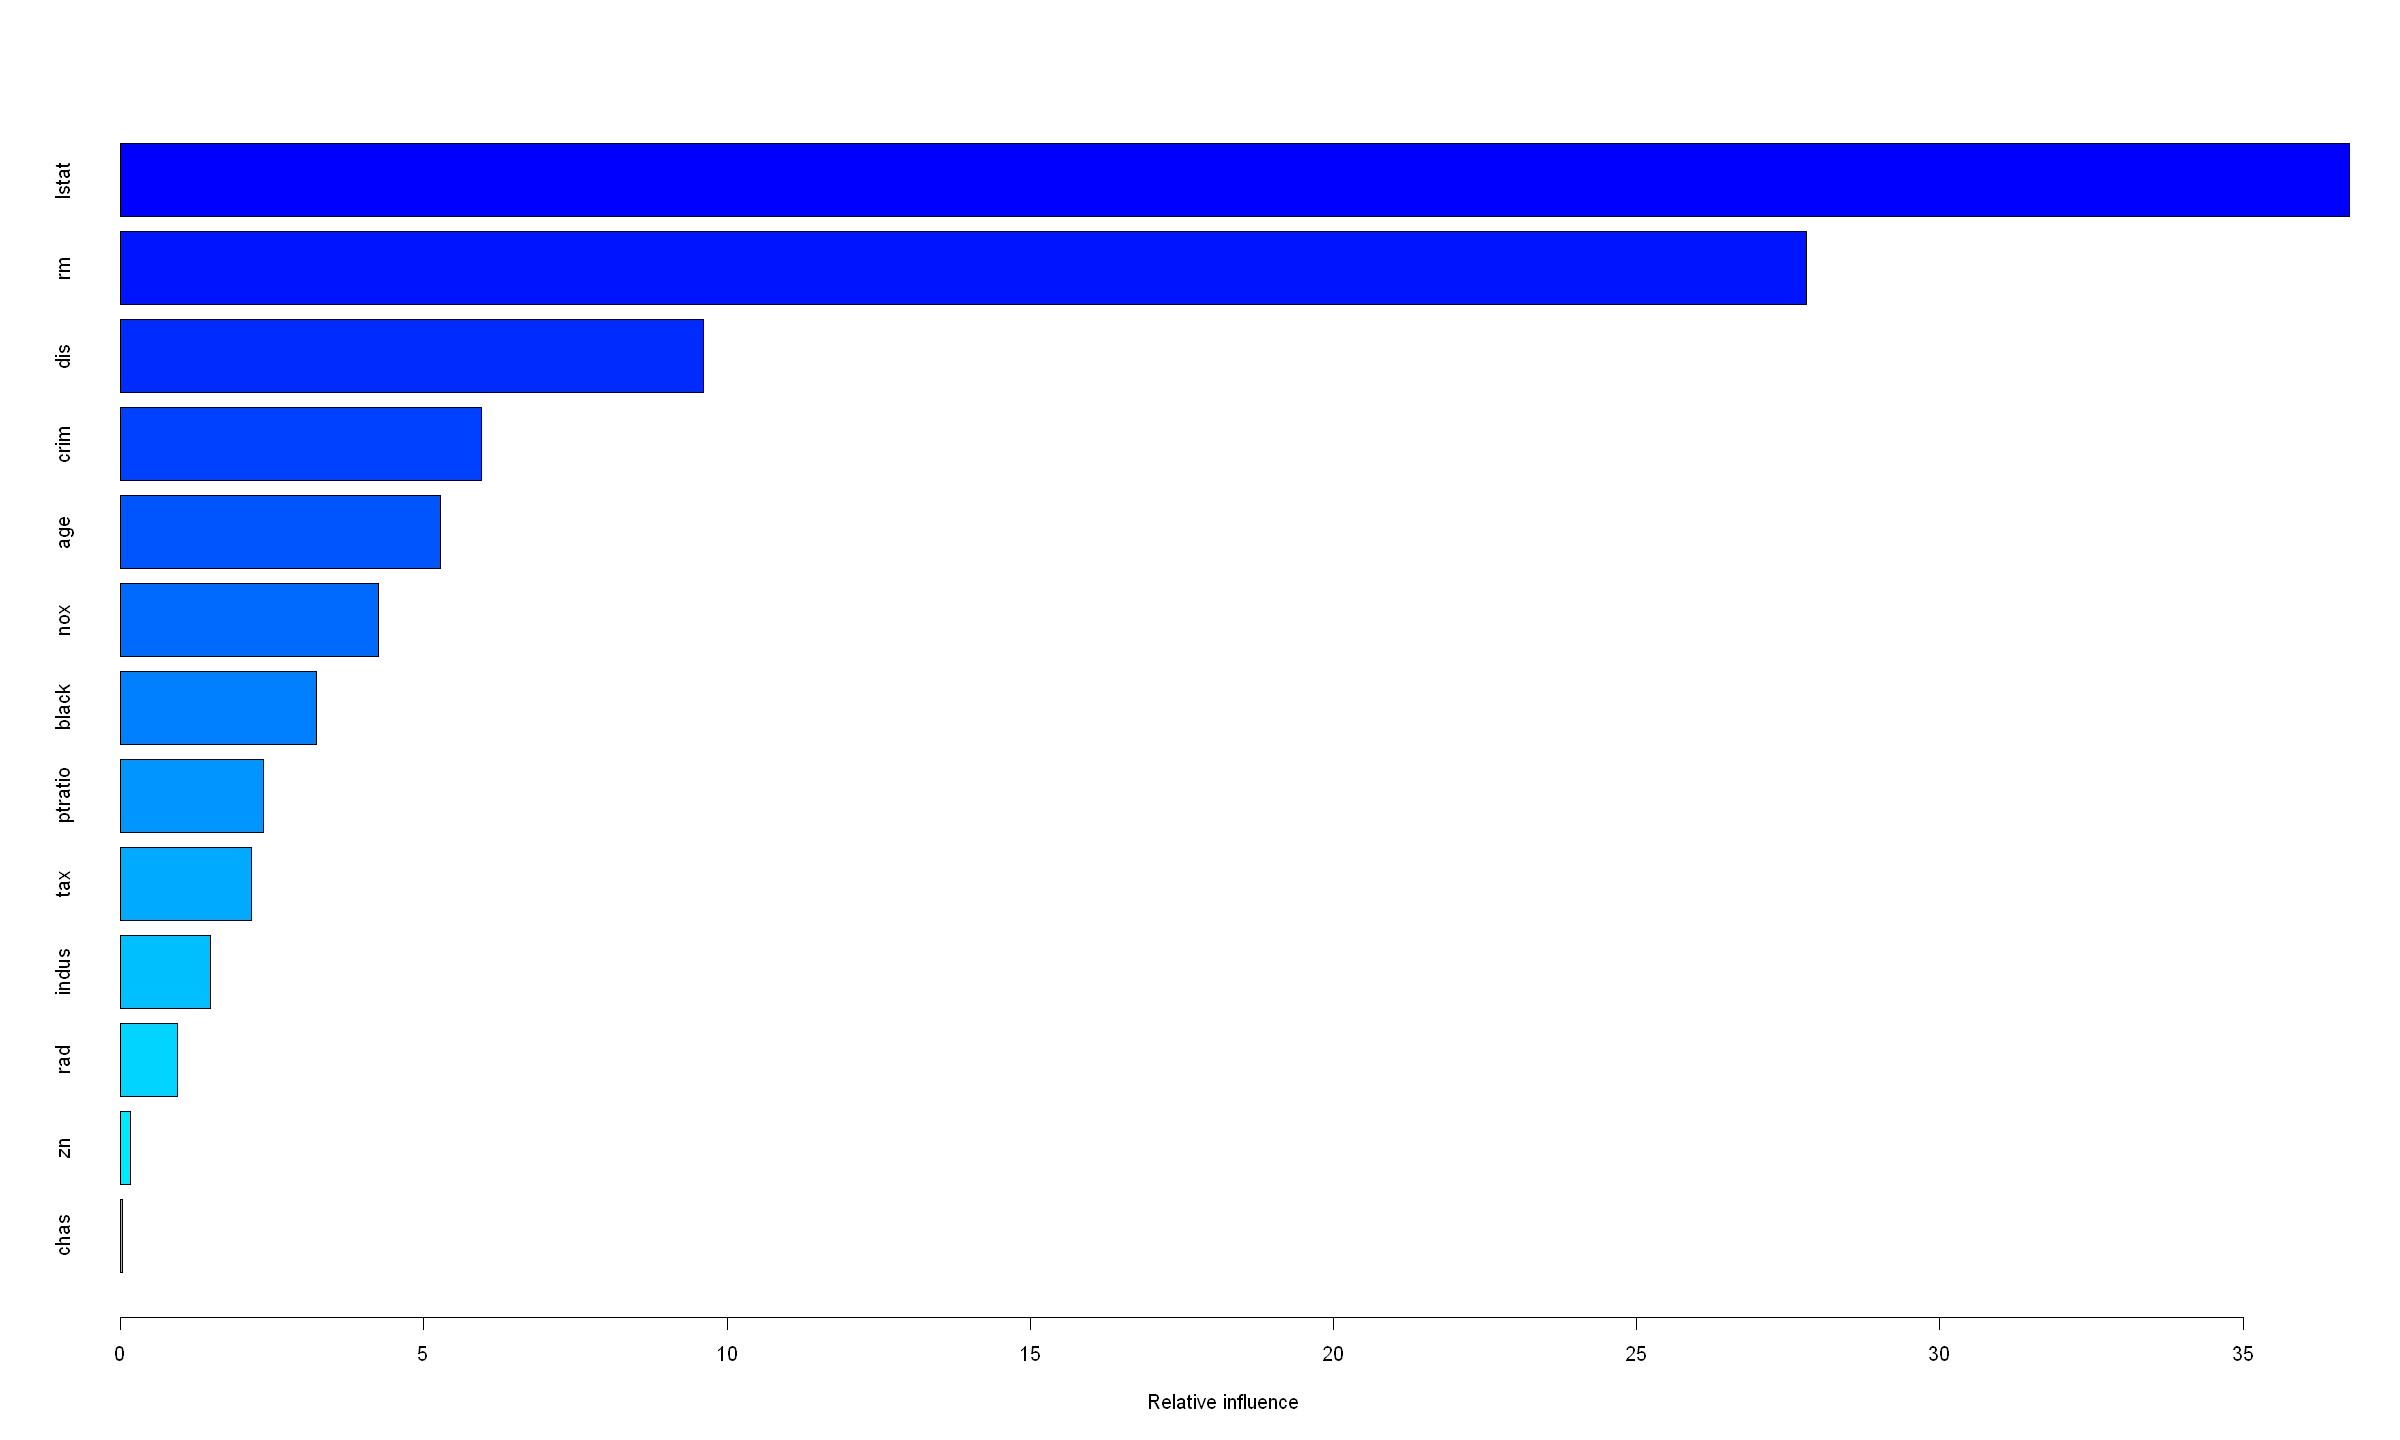

In [53]:
summary(boost_boston)

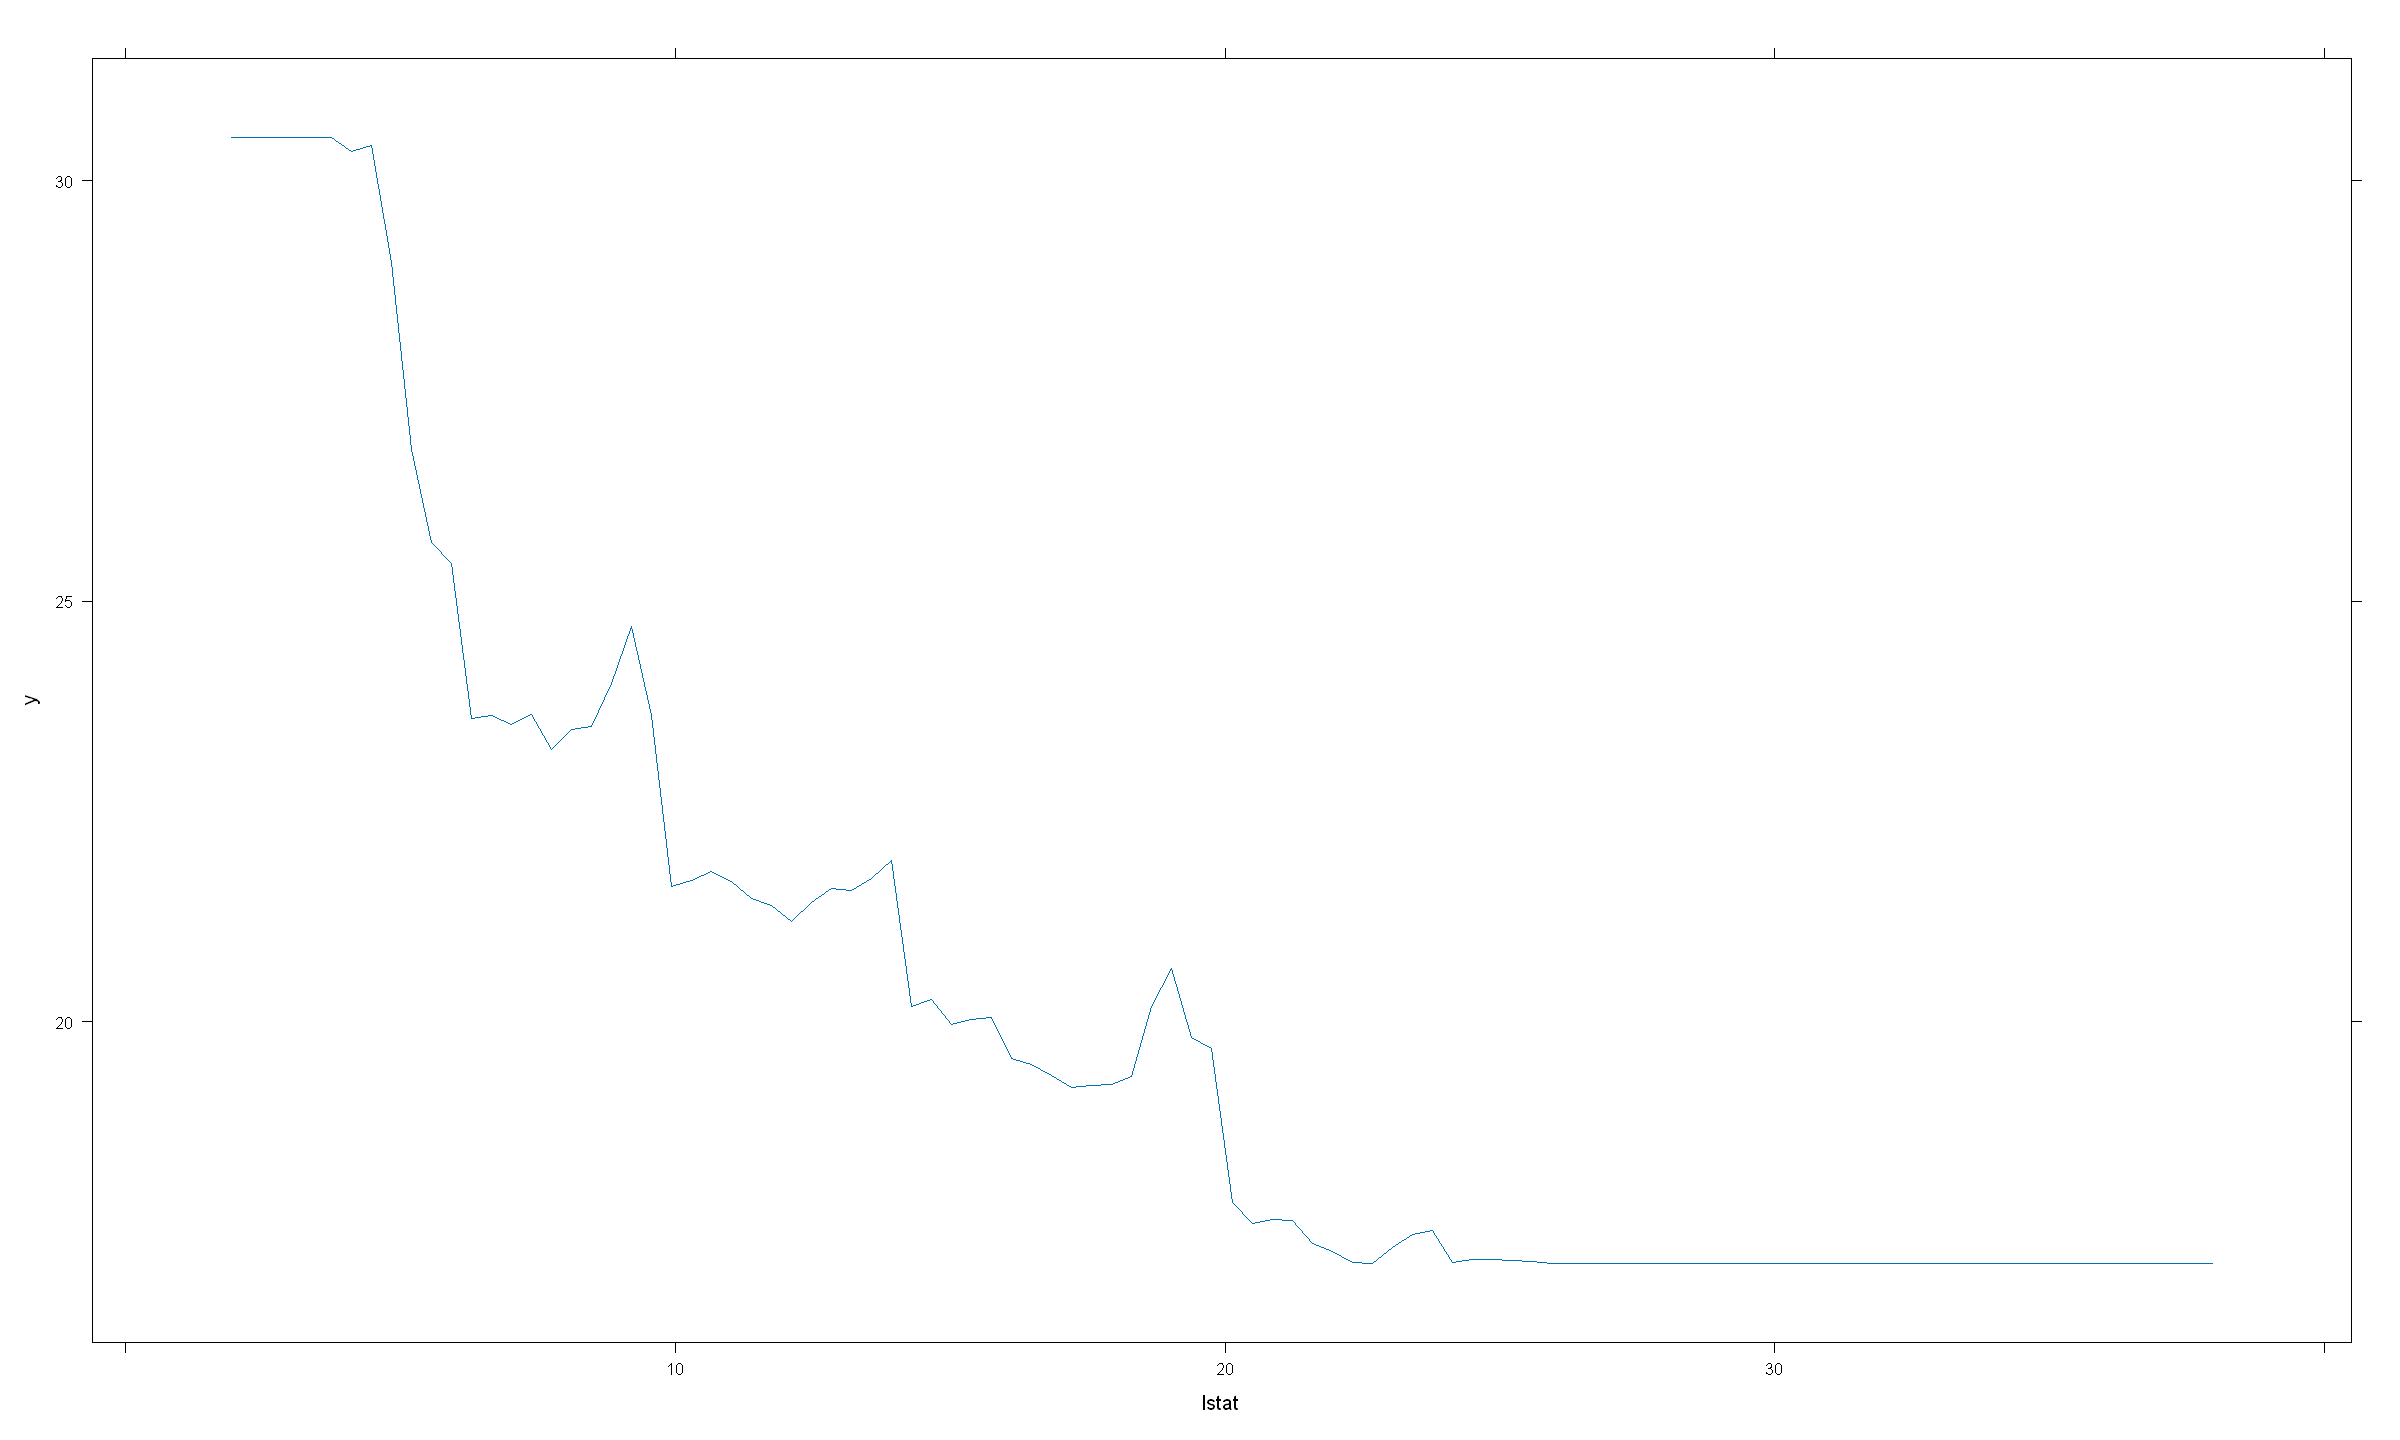

In [55]:
plot(boost_boston, i='lstat')

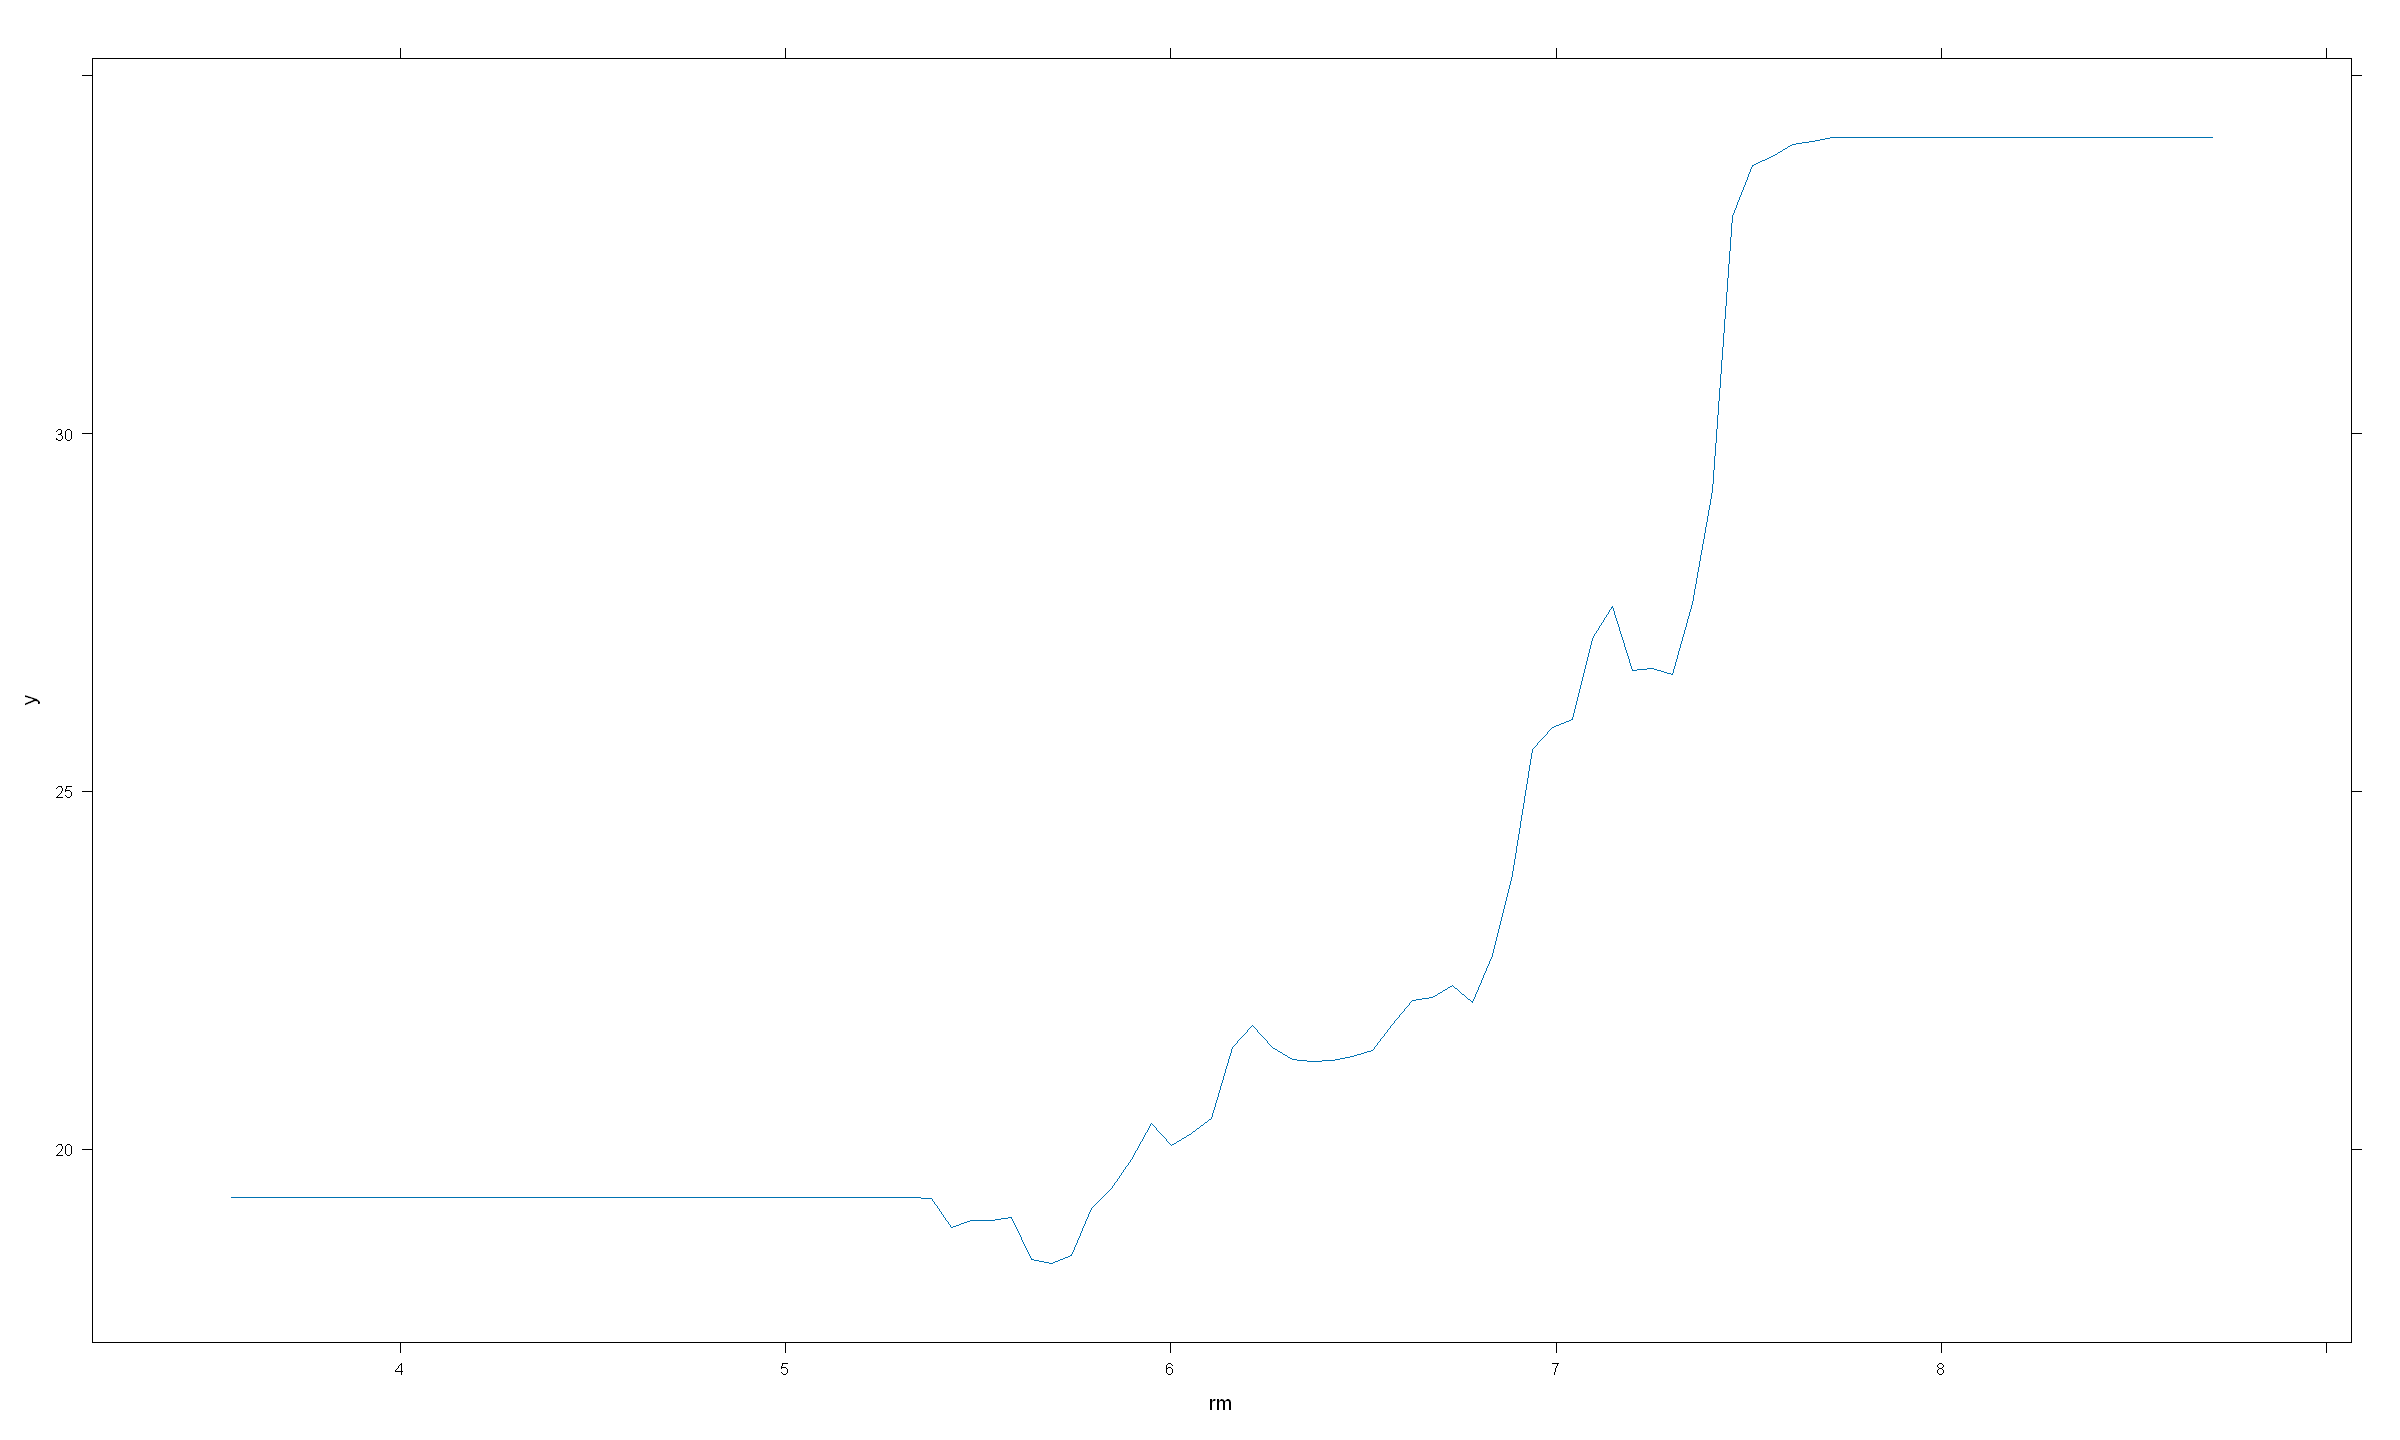

In [56]:
plot(boost_boston,i='rm')

In [57]:
n_trees = seq(from=100,to=10000,by=100)

In [59]:
n_trees

[1]   100   200   300   400   500   600   700   800   900  1000  1100  1200
 [13]  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400
 [25]  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500  3600
 [37]  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700  4800
 [49]  4900  5000  5100  5200  5300  5400  5500  5600  5700  5800  5900  6000
 [61]  6100  6200  6300  6400  6500  6600  6700  6800  6900  7000  7100  7200
 [73]  7300  7400  7500  7600  7700  7800  7900  8000  8100  8200  8300  8400
 [85]  8500  8600  8700  8800  8900  9000  9100  9200  9300  9400  9500  9600
 [97]  9700  9800  9900 10000

In [61]:
predmat = predict(boost_boston,newdata = Boston[-train,],n.trees = n_trees)

In [62]:
dim(predmat)

[1] 206 100

In [64]:
berr <- with(Boston[-train, ], apply((predmat - medv)^2, 2, mean))


In [75]:
min(test_err)

[1] 10.45534

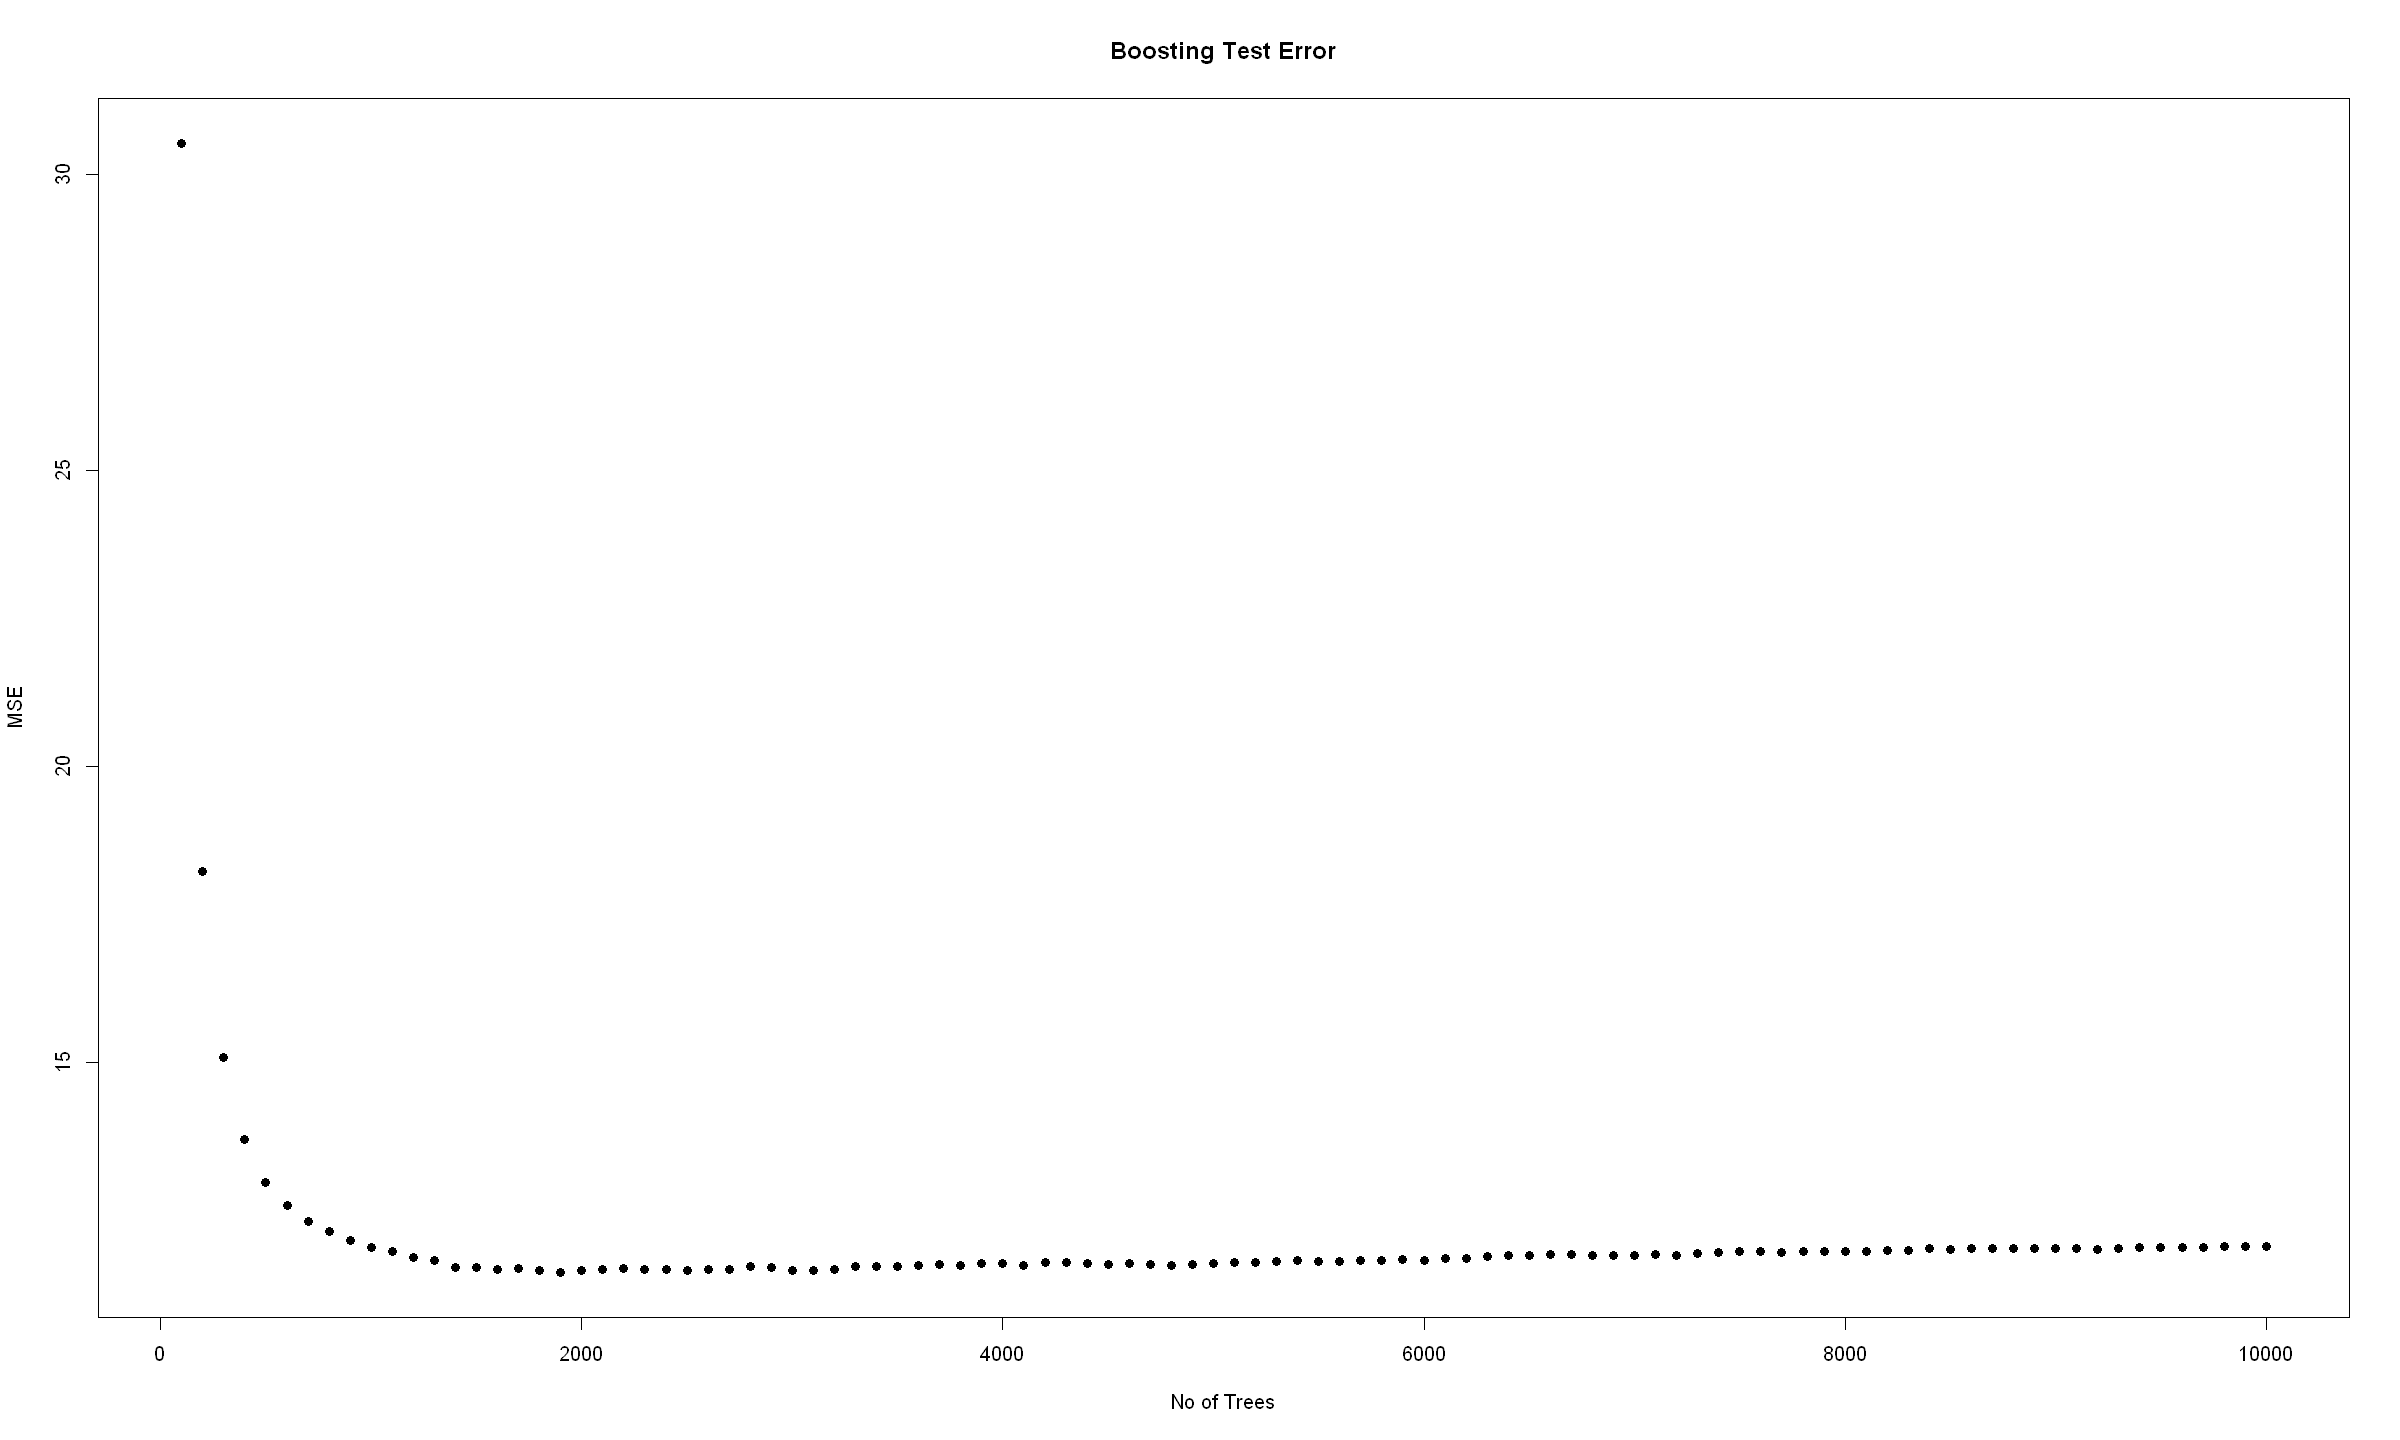

In [76]:
# Assuming test_err is defined and contains the minimum error value
plot(n_trees,
     berr,
     pch = 19,
     ylab = "MSE",
     xlab = "No of Trees",
     main = "Boosting Test Error"
)
abline(h = min(test_err), col = "red")



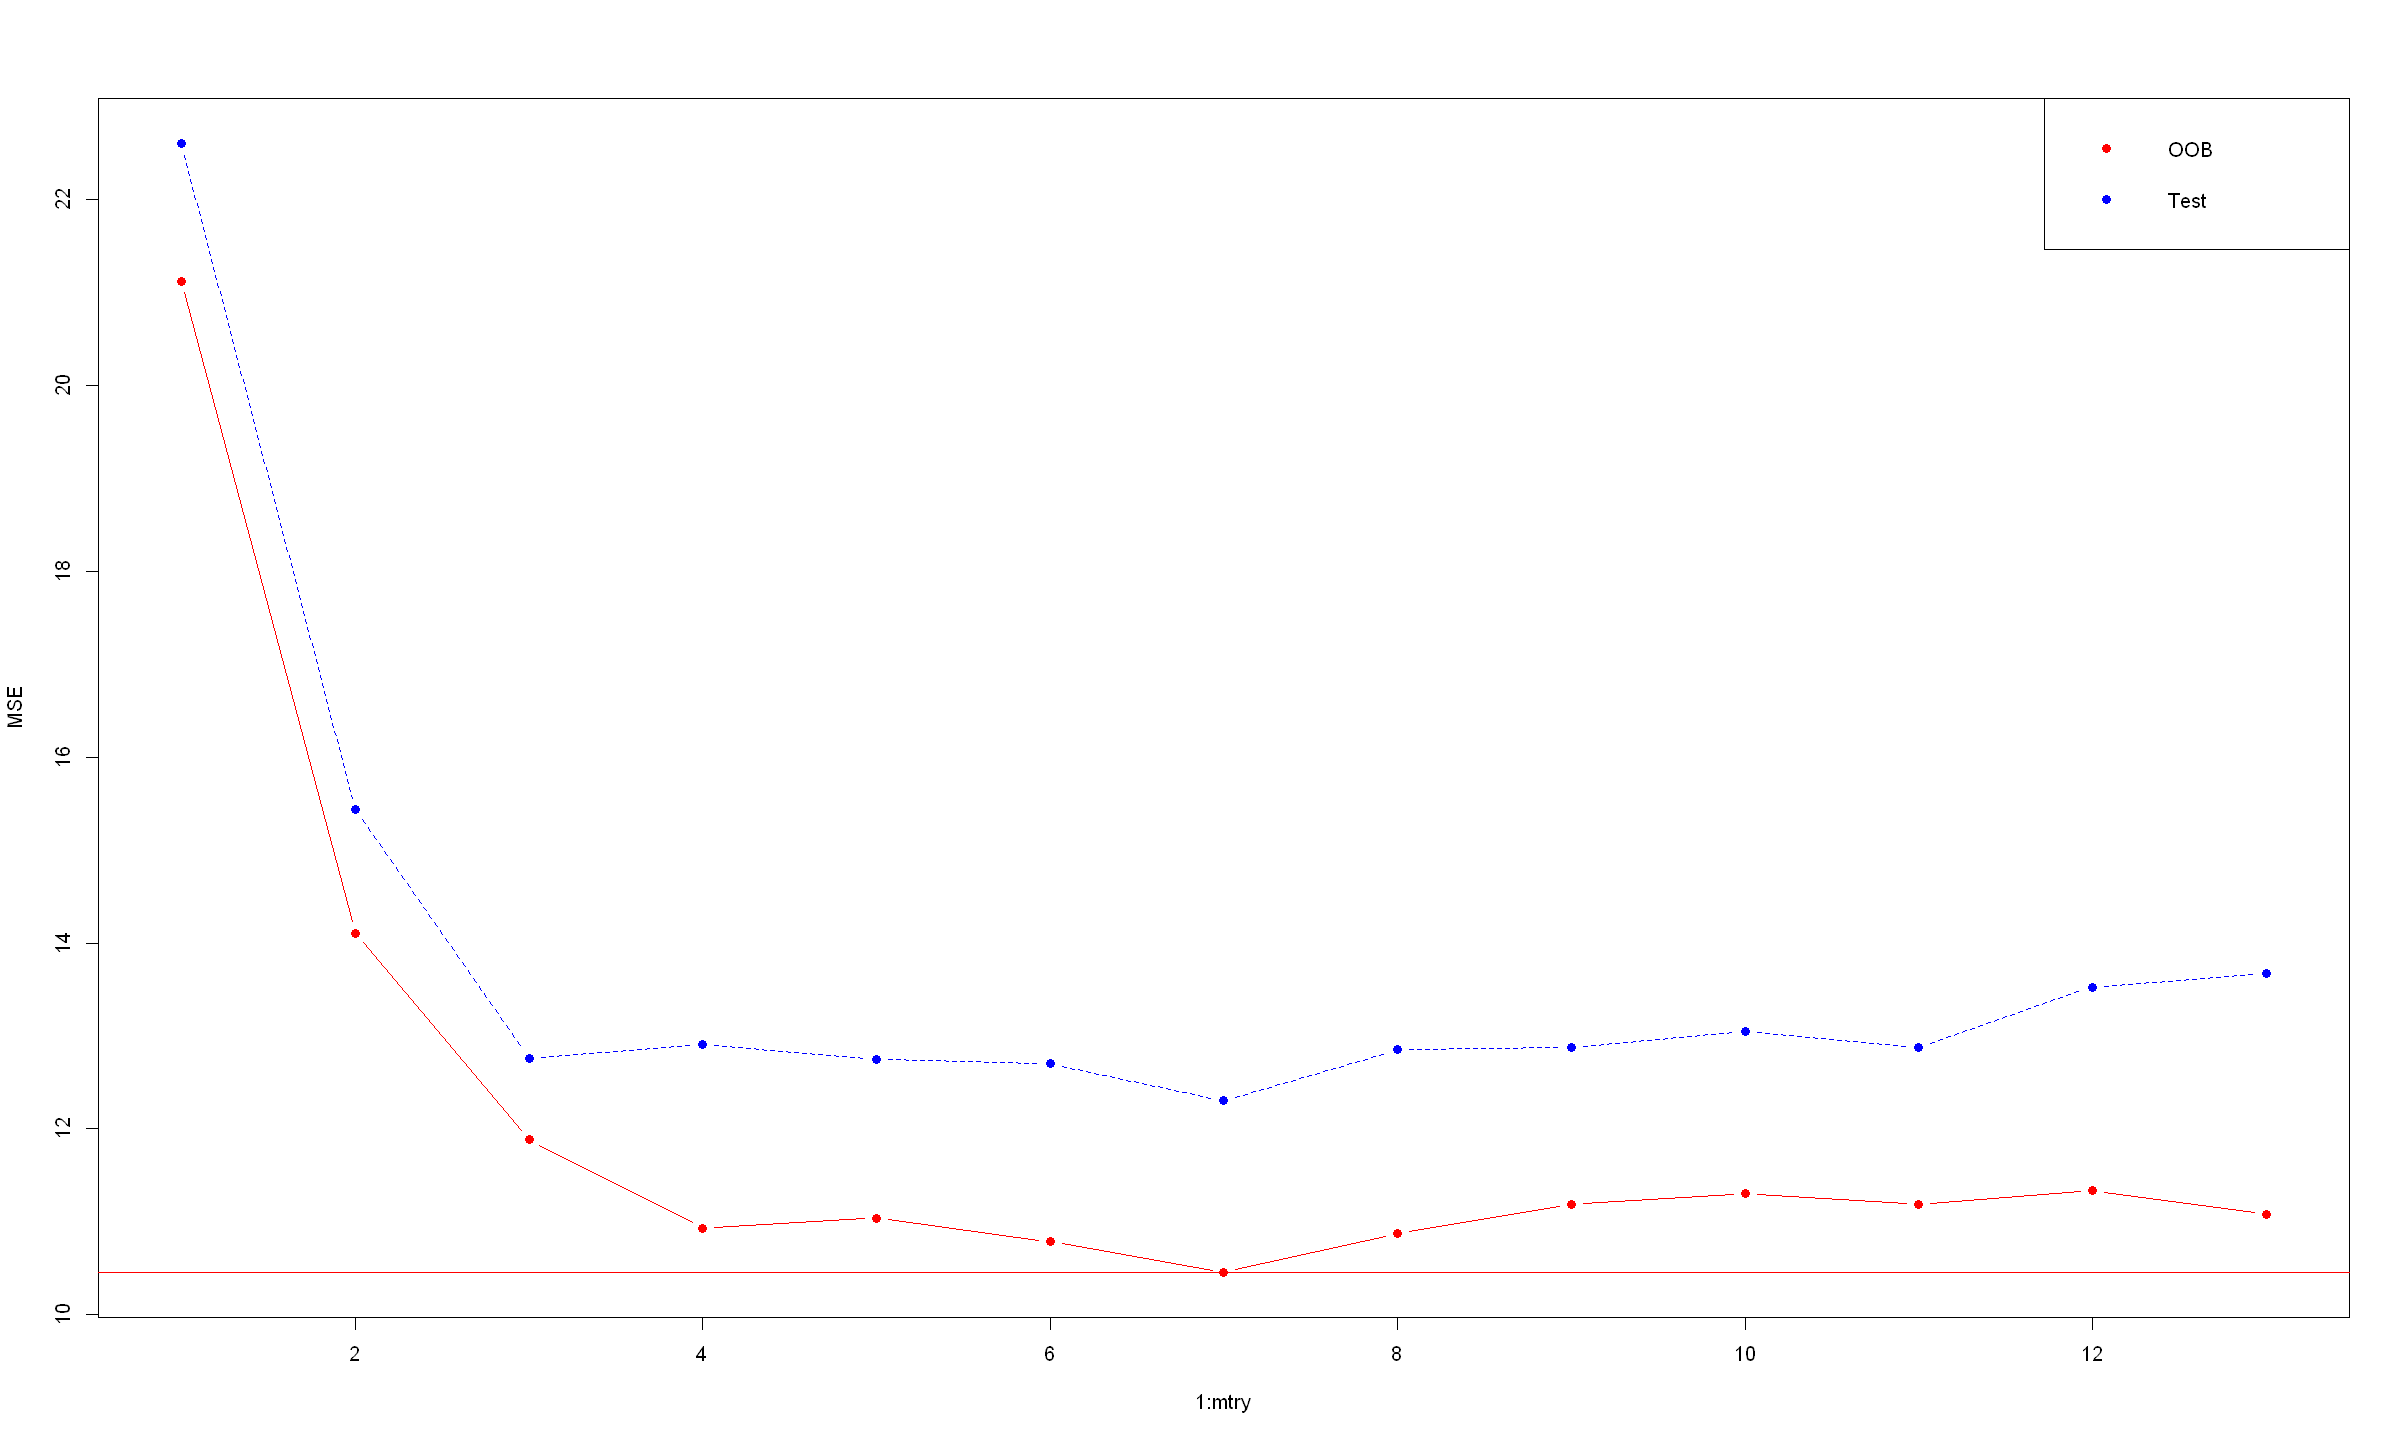

In [68]:
matplot(1:mtry, cbind(test_err, oob_err), pch = 19, col = c(
  "red",
  "blue"
), type = "b", ylab = "MSE")
legend("topright", legend = c("OOB", "Test"), pch = 19, col = c("red", "blue"))
abline(h = min(test_err), col = "red")